In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv('HousePrices.csv')
df.head()

Id  Dwell_Type Zone_Class  LotFrontage  LotArea Road_Type Alley  \
0   1          60         RL         65.0     8450      Pave   NaN   
1   2          20         RL         80.0     9600      Pave   NaN   
2   3          60         RL         68.0    11250      Pave   NaN   
3   4          70         RL         60.0     9550      Pave   NaN   
4   5          60         RL         84.0    14260      Pave   NaN   

  Property_Shape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
0            Reg         Lvl    AllPub  ...        0    NaN   NaN         NaN   
1            Reg         Lvl    AllPub  ...        0    NaN   NaN         NaN   
2            IR1         Lvl    AllPub  ...        0    NaN   NaN         NaN   
3            IR1         Lvl    AllPub  ...        0    NaN   NaN         NaN   
4            IR1         Lvl    AllPub  ...        0    NaN   NaN         NaN   

  MiscVal MoSold YrSold  SaleType  SaleCondition  Property_Sale_Price  
0       0      2   2008        WD         Normal               208500  
1       0      5   2007        WD         Normal               181500  
2       0      9   2008        WD         Normal               223500  
3       0      2   2006        WD        Abnorml               140000  
4       0     12   2008        WD         Normal               250000  

[5 rows x 81 columns]

In [68]:
df.shape

(2073, 81)

#### Handling Null Values

In [69]:
def fetch_count_and_percent_of_null(data):  # data is df
    nv = data.isnull().sum()  # nv = null values
    nv = nv[nv>0]
    res = pd.DataFrame({'Feature':nv.index,'Count_Null':nv.values,
                       'Percent_Null':(nv.values/data.shape[0])*100})
    res = res.sort_values('Percent_Null',ascending=False)
    return res

In [70]:
fetch_count_and_percent_of_null(df)

Feature  Count_Null  Percent_Null
16        PoolQC        2065     99.614086
18   MiscFeature        1993     96.140859
1          Alley        1944     93.777135
17         Fence        1669     80.511336
10   FireplaceQu         988     47.660396
0    LotFrontage         320     15.436565
11    GarageType         113      5.451037
12   GarageYrBlt         113      5.451037
13  GarageFinish         113      5.451037
14    GarageQual         113      5.451037
15    GarageCond         113      5.451037
6   BsmtExposure          61      2.942595
8   BsmtFinType2          60      2.894356
7   BsmtFinType1          59      2.846117
5       BsmtCond          59      2.846117
4       BsmtQual          59      2.846117
3     MasVnrArea          14      0.675350
2     MasVnrType          14      0.675350
9     Electrical           1      0.048239

In [71]:
df.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCo

#### Drop features with 80%  and more of Null Values

In [72]:
df.drop(['PoolQC','Fence','Alley','MiscFeature'],axis=1,inplace=True)
df.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pav

In [73]:
fetch_count_and_percent_of_null(df)

Feature  Count_Null  Percent_Null
9    FireplaceQu         988     47.660396
0    LotFrontage         320     15.436565
10    GarageType         113      5.451037
11   GarageYrBlt         113      5.451037
12  GarageFinish         113      5.451037
13    GarageQual         113      5.451037
14    GarageCond         113      5.451037
5   BsmtExposure          61      2.942595
7   BsmtFinType2          60      2.894356
3       BsmtQual          59      2.846117
4       BsmtCond          59      2.846117
6   BsmtFinType1          59      2.846117
1     MasVnrType          14      0.675350
2     MasVnrArea          14      0.675350
8     Electrical           1      0.048239

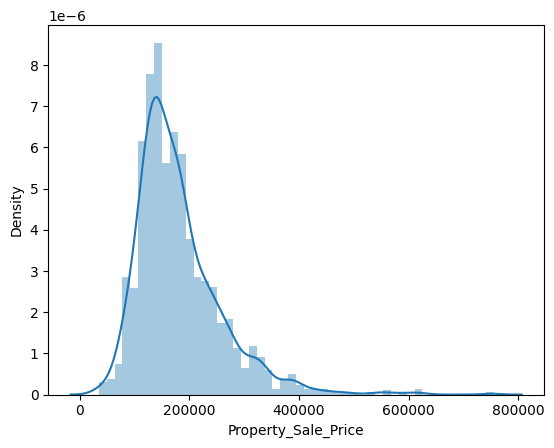

In [74]:
sns.distplot(df['Property_Sale_Price'])
plt.show()

#### Inference
1) Property Sale Price is right skewed

#### Handling nulls Garagre Based Features

In [75]:
a = fetch_count_and_percent_of_null(df)
a

Feature  Count_Null  Percent_Null
9    FireplaceQu         988     47.660396
0    LotFrontage         320     15.436565
10    GarageType         113      5.451037
11   GarageYrBlt         113      5.451037
12  GarageFinish         113      5.451037
13    GarageQual         113      5.451037
14    GarageCond         113      5.451037
5   BsmtExposure          61      2.942595
7   BsmtFinType2          60      2.894356
3       BsmtQual          59      2.846117
4       BsmtCond          59      2.846117
6   BsmtFinType1          59      2.846117
1     MasVnrType          14      0.675350
2     MasVnrArea          14      0.675350
8     Electrical           1      0.048239

In [76]:
a['Feature'].values

array(['FireplaceQu', 'LotFrontage', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure',
       'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'Electrical'], dtype=object)

In [77]:
cols = ['GarageType','GarageFinish', 'GarageQual', 'GarageCond']
for i in cols:
    print(i)
    print(df[i].value_counts())
    print('*'*30)

GarageType
Attchd     1252
Detchd      537
BuiltIn     124
Basment      27
CarPort      12
2Types        8
Name: GarageType, dtype: int64
******************************
GarageFinish
Unf    857
RFn    605
Fin    498
Name: GarageFinish, dtype: int64
******************************
GarageQual
TA    1870
Fa      65
Gd      18
Ex       4
Po       3
Name: GarageQual, dtype: int64
******************************
GarageCond
TA    1885
Fa      47
Gd      17
Po       8
Ex       3
Name: GarageCond, dtype: int64
******************************


In [78]:
cols = ['GarageType','GarageFinish', 'GarageQual', 'GarageCond']
for i in cols:
    df[i] = df[i].fillna('No Garage')

In [79]:
a = fetch_count_and_percent_of_null(df)
a

Feature  Count_Null  Percent_Null
9    FireplaceQu         988     47.660396
0    LotFrontage         320     15.436565
10   GarageYrBlt         113      5.451037
5   BsmtExposure          61      2.942595
7   BsmtFinType2          60      2.894356
3       BsmtQual          59      2.846117
4       BsmtCond          59      2.846117
6   BsmtFinType1          59      2.846117
1     MasVnrType          14      0.675350
2     MasVnrArea          14      0.675350
8     Electrical           1      0.048239

In [80]:
cols = ['BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']
for i in cols:
    print(i)
    print(df[i].value_counts())
    print('*'*30)

BsmtFinType2
Unf    1770
Rec      79
LwQ      68
BLQ      50
ALQ      24
GLQ      22
Name: BsmtFinType2, dtype: int64
******************************
BsmtQual
Gd    904
TA    891
Ex    169
Fa     50
Name: BsmtQual, dtype: int64
******************************
BsmtCond
TA    1851
Gd     100
Fa      61
Po       2
Name: BsmtCond, dtype: int64
******************************
BsmtFinType1
Unf    604
GLQ    599
ALQ    319
BLQ    210
Rec    173
LwQ    109
Name: BsmtFinType1, dtype: int64
******************************


In [81]:
cols = ['BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']
for i in cols:
    df[i] = df[i].fillna('No Basement')

In [82]:
a = fetch_count_and_percent_of_null(df)
a

Feature  Count_Null  Percent_Null
5   FireplaceQu         988     47.660396
0   LotFrontage         320     15.436565
6   GarageYrBlt         113      5.451037
3  BsmtExposure          61      2.942595
1    MasVnrType          14      0.675350
2    MasVnrArea          14      0.675350
4    Electrical           1      0.048239

In [83]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')

In [84]:
a = fetch_count_and_percent_of_null(df)
a

Feature  Count_Null  Percent_Null
0   LotFrontage         320     15.436565
5   GarageYrBlt         113      5.451037
3  BsmtExposure          61      2.942595
1    MasVnrType          14      0.675350
2    MasVnrArea          14      0.675350
4    Electrical           1      0.048239

In [85]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [86]:
a = fetch_count_and_percent_of_null(df)
a

Feature  Count_Null  Percent_Null
4   GarageYrBlt         113      5.451037
2  BsmtExposure          61      2.942595
0    MasVnrType          14      0.675350
1    MasVnrArea          14      0.675350
3    Electrical           1      0.048239

In [87]:
df['GarageYrBlt'].value_counts().sort_values(ascending=False)

2005.0    116
2006.0     82
2007.0     81
2003.0     72
2004.0     66
         ... 
1908.0      1
1906.0      1
2013.0      1
2019.0      1
2015.0      1
Name: GarageYrBlt, Length: 102, dtype: int64

In [88]:
df['GarageYrBlt'].fillna(2005.0,inplace=True)

In [89]:
df.shape

(2073, 77)

In [90]:
a = fetch_count_and_percent_of_null(df)
a

Feature  Count_Null  Percent_Null
2  BsmtExposure          61      2.942595
0    MasVnrType          14      0.675350
1    MasVnrArea          14      0.675350
3    Electrical           1      0.048239

#### Drop records with less than 5% of null values

In [91]:
df1 = df.copy()

In [92]:
df.dropna(inplace=True) # axis=0 => Rows

In [93]:
df.shape

(1997, 77)

#### Percenatge of data loss

In [94]:
((2073 - df.shape[0])/2073)*100

3.6661842739990353

In [95]:
df.shape

(1997, 77)

In [96]:
fetch_count_and_percent_of_null(df)

Empty DataFrame
Columns: [Feature, Count_Null, Percent_Null]
Index: []

#### Handle Duplicates

In [97]:
df.duplicated().sum()

12

In [98]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [99]:
df.shape

(1985, 77)

### EDA

In [100]:
df.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pav

#### Garage based Features wrt Sales Price

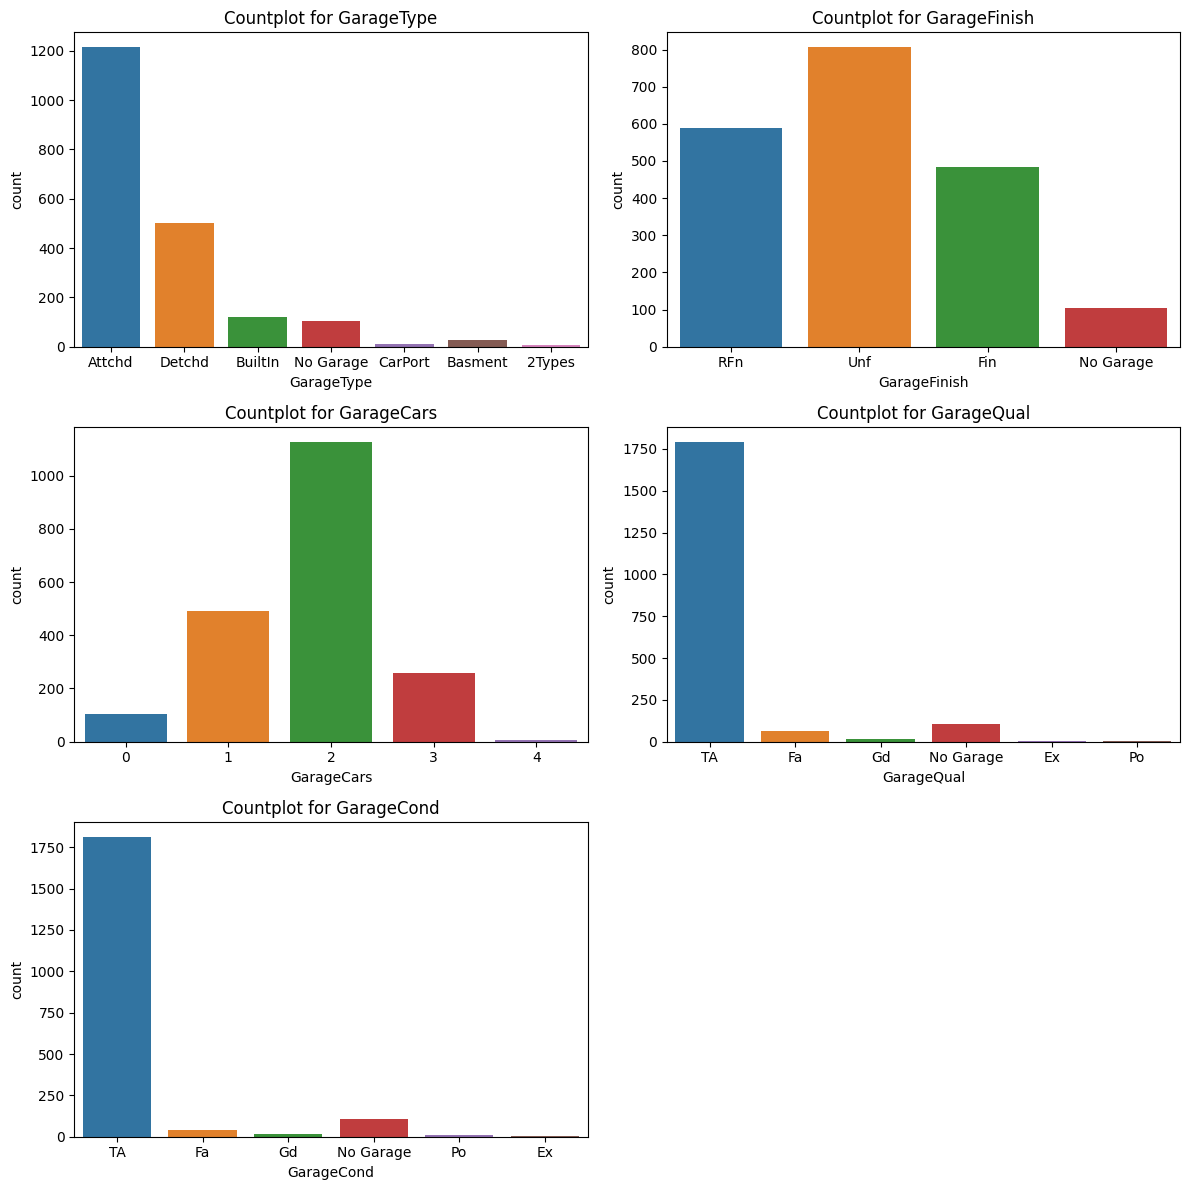

In [101]:
cols = ['GarageType', 'GarageFinish', 'GarageCars','GarageQual','GarageCond']

plt.figure(figsize=(12,12))
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=df[cols[i]])
    plt.title(f'Countplot for {cols[i]}')

plt.tight_layout()
plt.show()

#### Observations
1) Majority houses have Attached Gagage and are unfinished with TA qual.<br>
2) garageQual and GarageCond seems similr.

#### Infernces
1) One of garageQual and GarageCond can be dropped (as they seem similar)

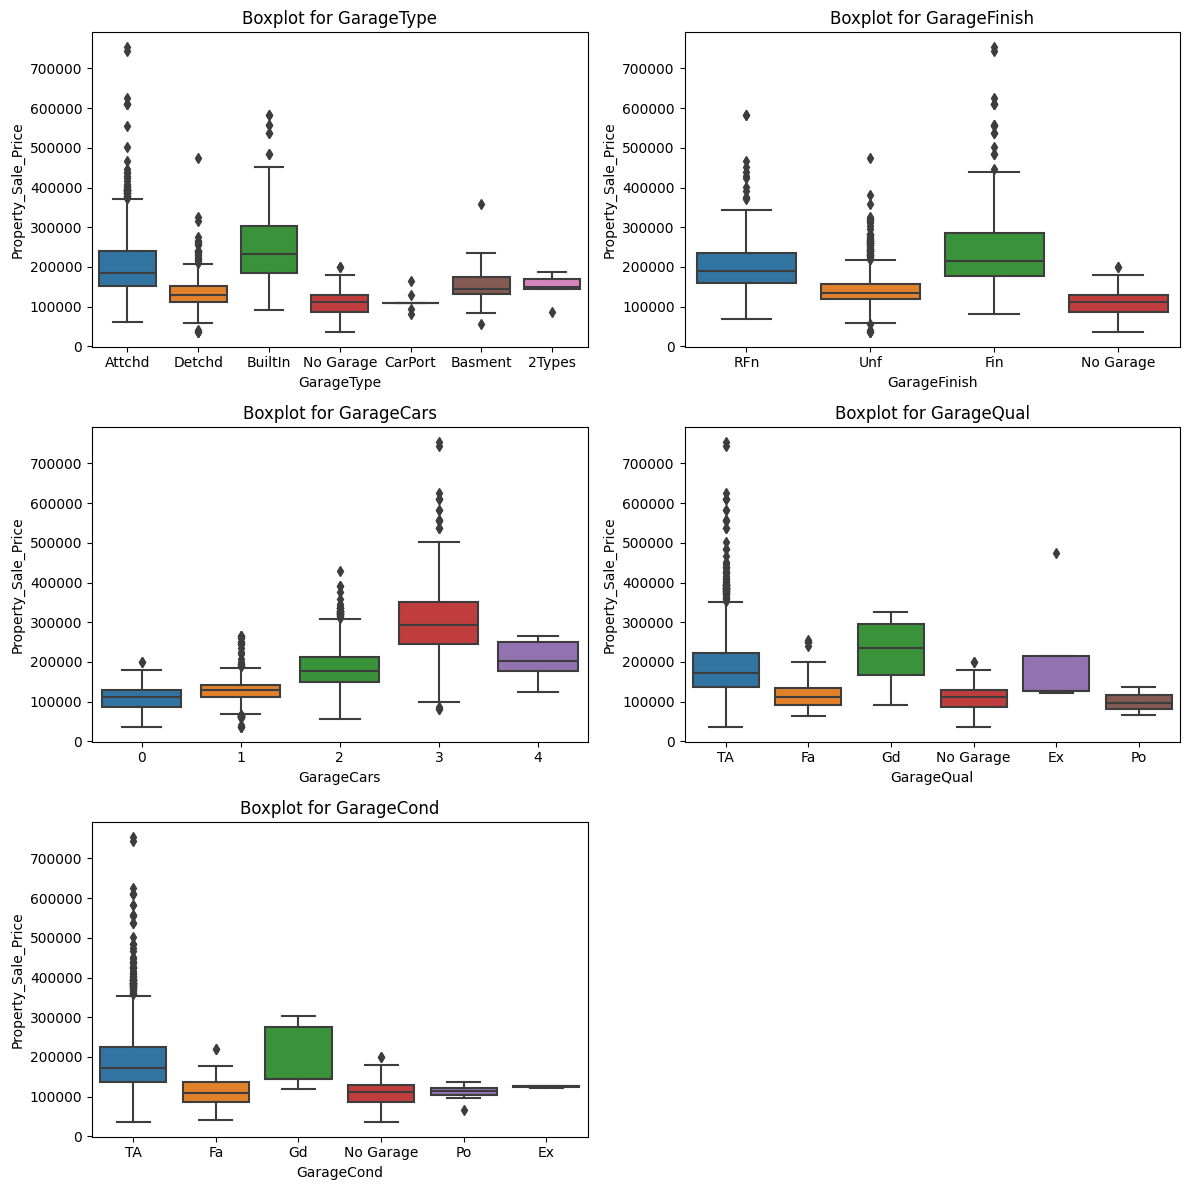

In [102]:
cols = ['GarageType', 'GarageFinish', 'GarageCars','GarageQual','GarageCond']

plt.figure(figsize=(12,12))
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=df[cols[i]],y=df['Property_Sale_Price'])
    plt.title(f'Boxplot for {cols[i]}')

plt.tight_layout()
plt.show()

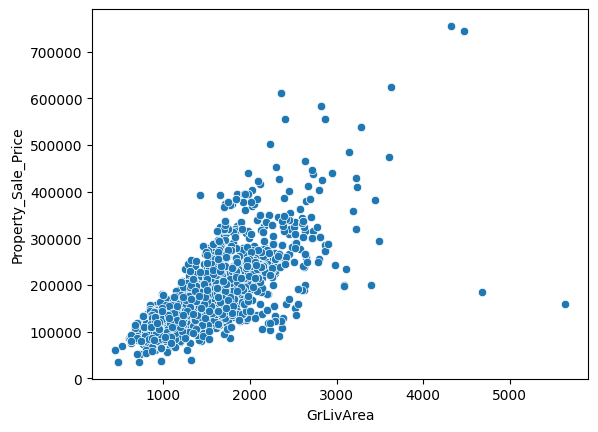

In [103]:
cols = ['GarageArea']
sns.scatterplot(x = df['GrLivArea'], y = df['Property_Sale_Price'],palette= 'Spectral')
plt.show()

In [104]:
df.shape

(1985, 77)

#### Basemnet based Features wrt Sales Price

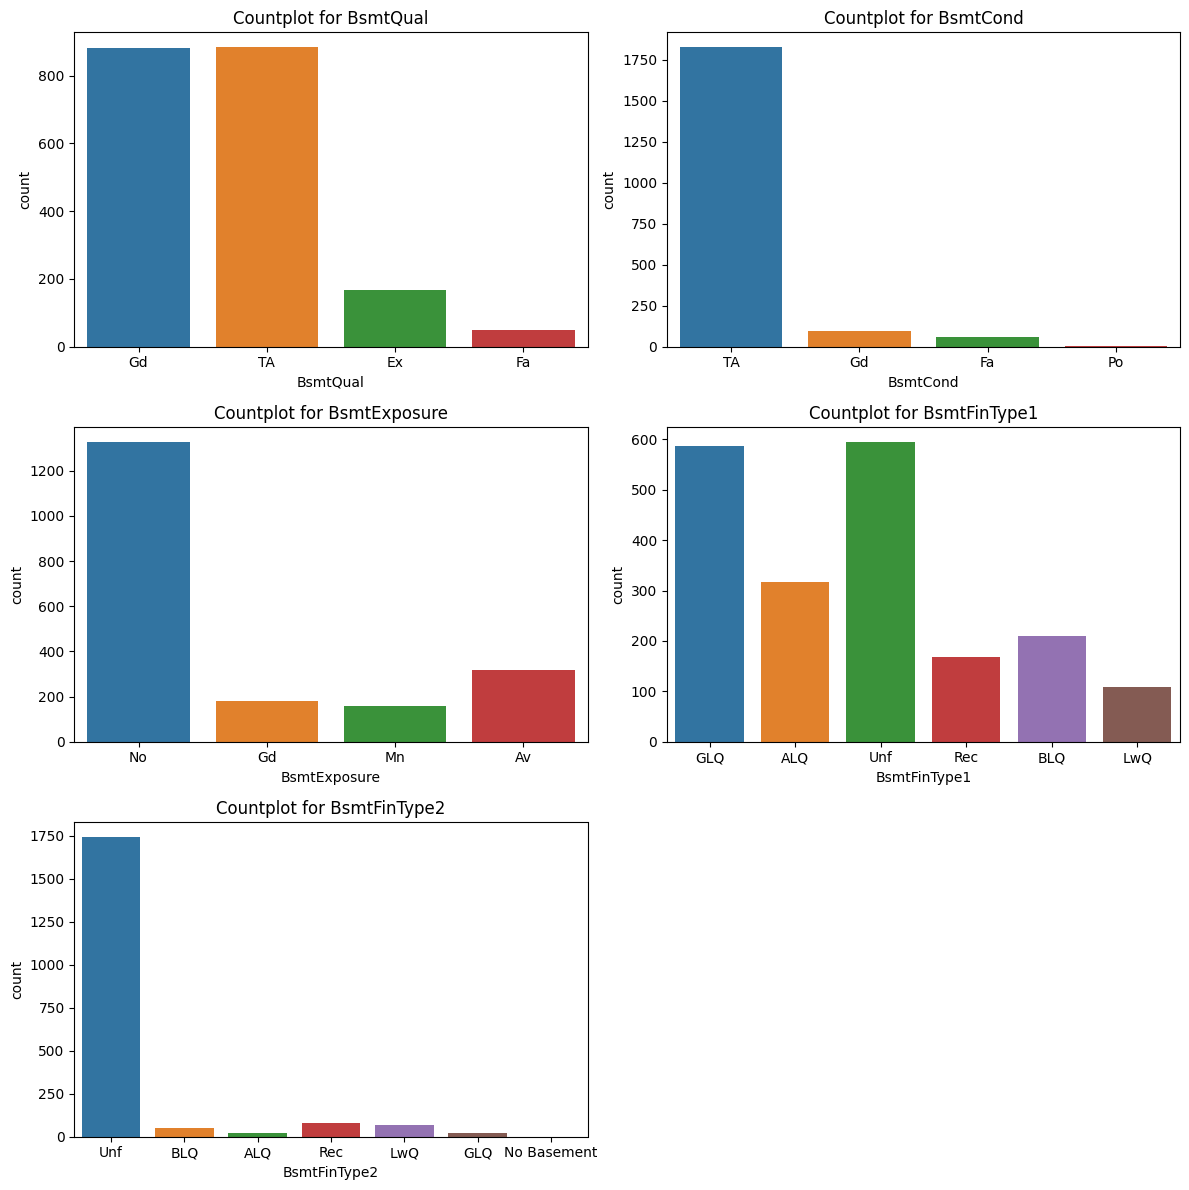

In [105]:
bs_cat_cols = ['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2']

plt.figure(figsize=(12,12))
for i in range(len(bs_cat_cols)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=df[bs_cat_cols[i]])
    plt.title(f'Countplot for {bs_cat_cols[i]}')

plt.tight_layout()
plt.show()

#### Observations
<pre>
1) Majority houses have Good and TA qulaity basemnets.
2) Majority houses have TA basemnet condition.
3) Majority houses have NO exposure to basement.
4) Majority houses have unfinished basemnt Type2.
</pre>

#### Inferences
1) BsmtFinType2 and BsmntCond can be dropped(as data is highly skewed towards just one category).

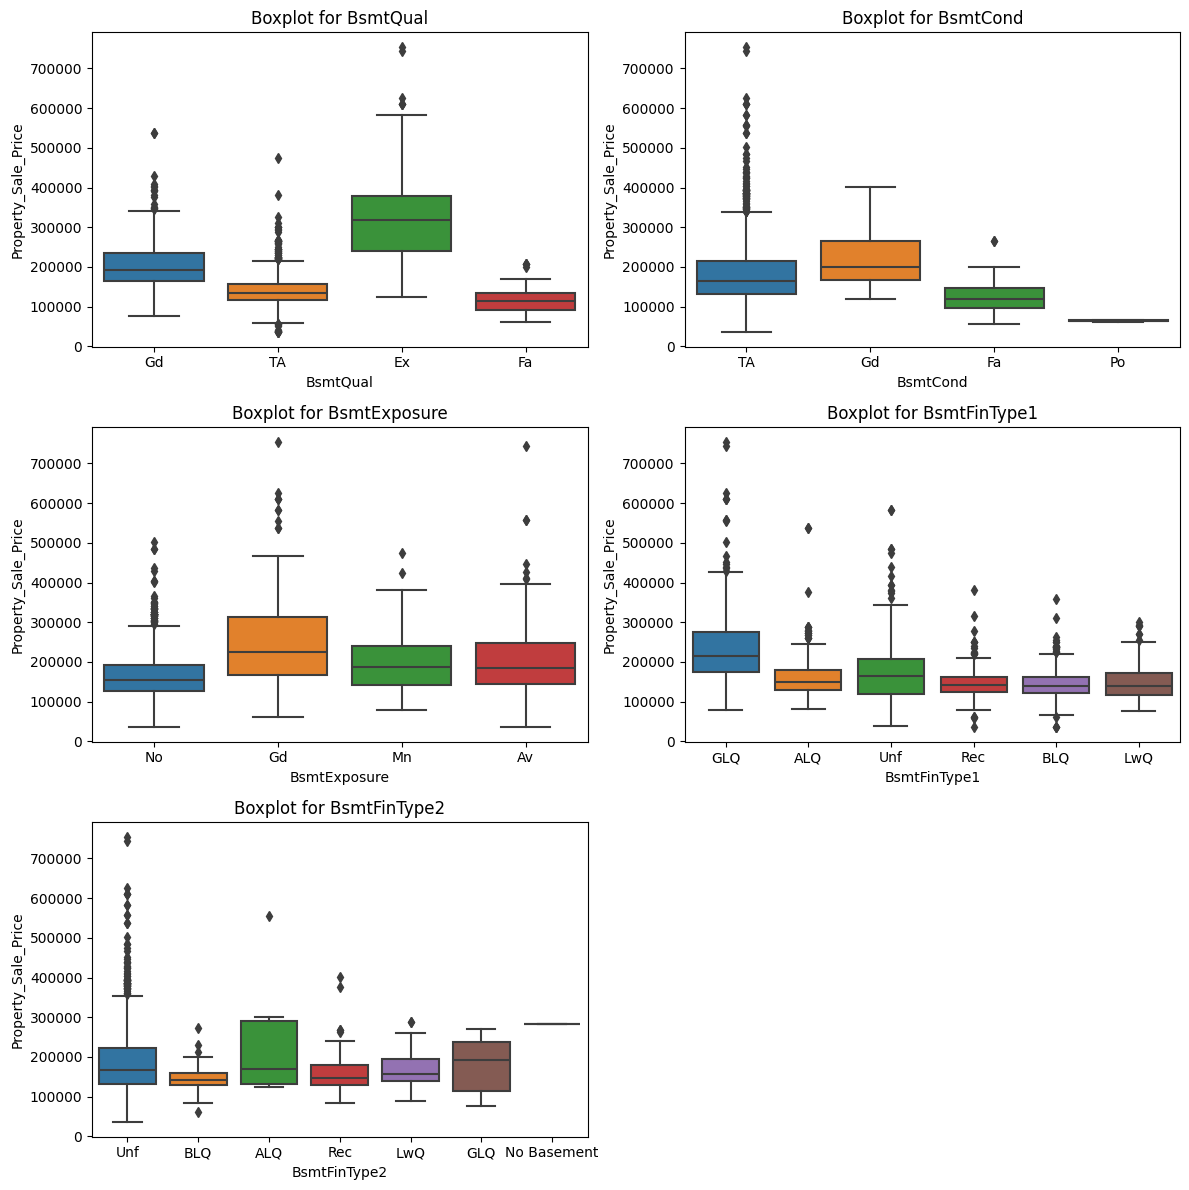

In [106]:
bs_cat_cols = ['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2']

plt.figure(figsize=(12,12))
for i in range(len(bs_cat_cols)):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=df[bs_cat_cols[i]],y =df['Property_Sale_Price'])
    plt.title(f'Boxplot for {bs_cat_cols[i]}')

plt.tight_layout()
plt.show()

#### Inferences
1) The boxplot suggests that the median sale Price varies for bsmntFinType2 and BsmtCond.


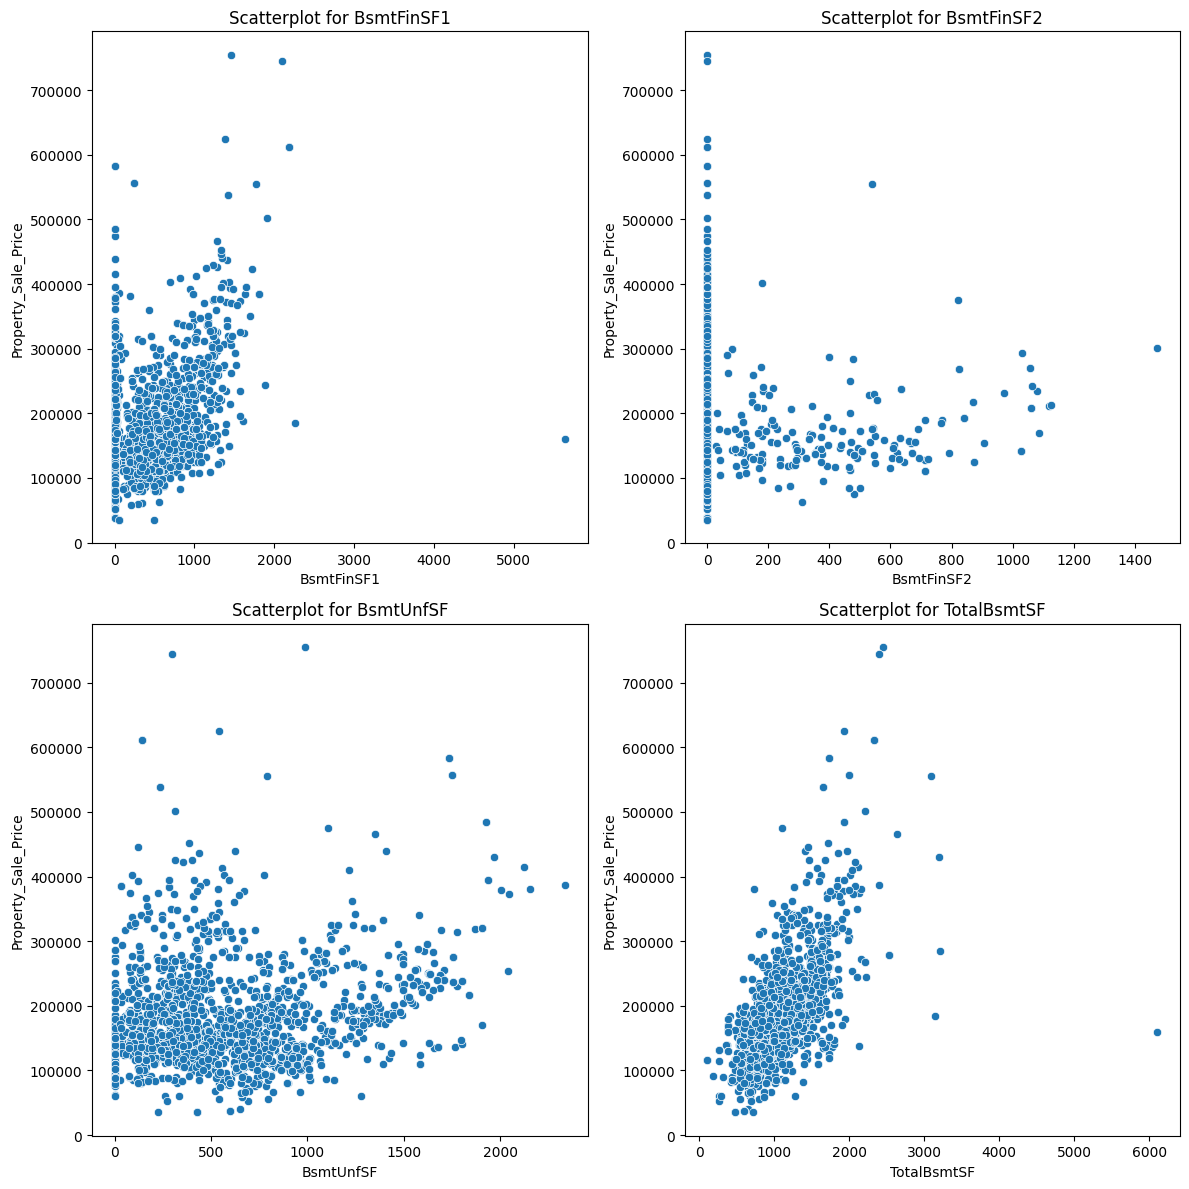

In [107]:
bs_cont_cols = ['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']

plt.figure(figsize=(12,12))
for i in range(len(bs_cont_cols)):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=df[bs_cont_cols[i]],y=df['Property_Sale_Price'])
    plt.title(f'Scatterplot for {bs_cont_cols[i]}')

plt.tight_layout()
plt.show()

#### Bedroom & Bathroom related Features

In [108]:
cols = [ 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr']
for i in cols:
    print(i,df[i].nunique())

BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8


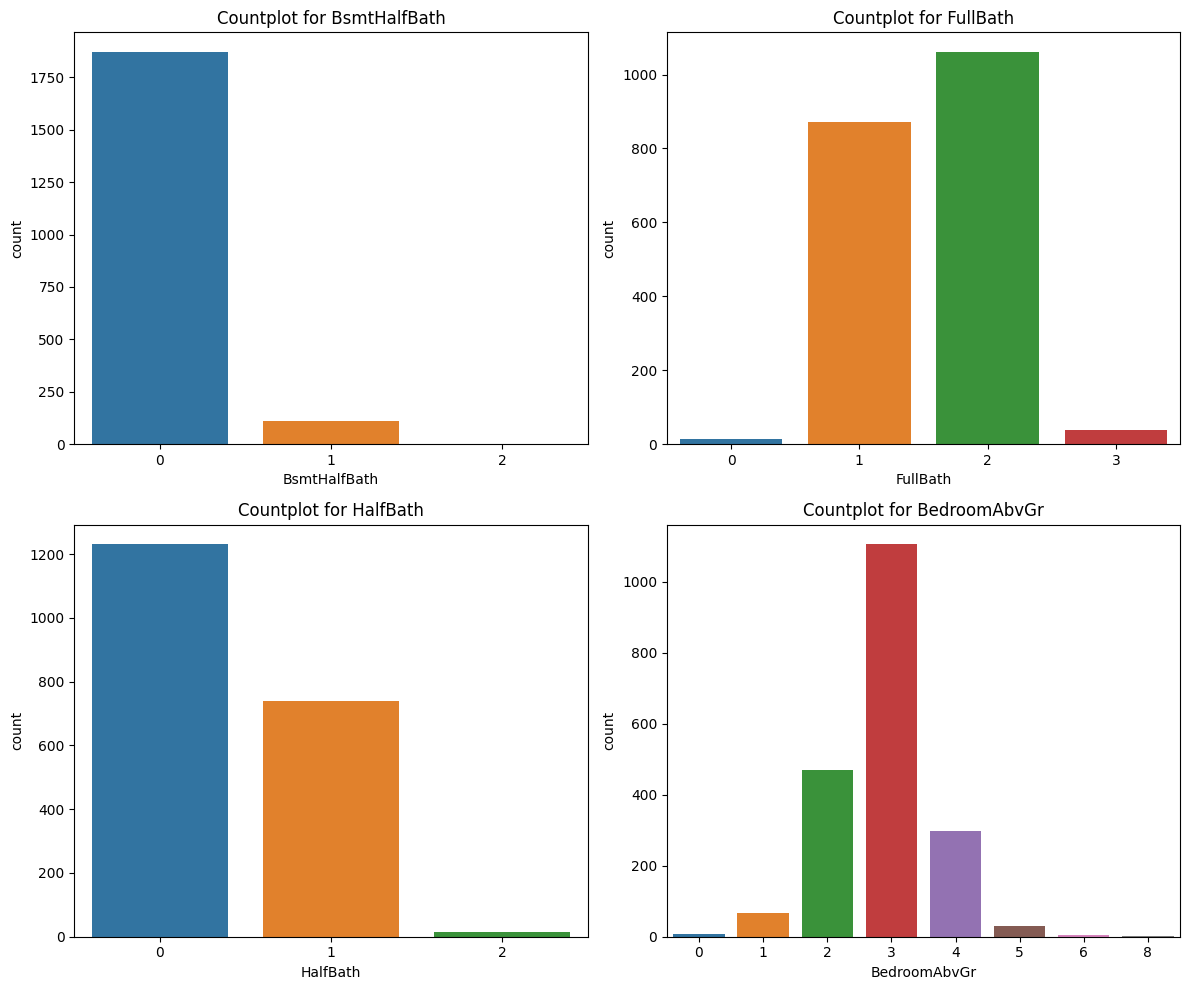

In [109]:
cols = [ 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr']
plt.figure(figsize=(12,10))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cols[i]])
    plt.title(f'Countplot for {cols[i]}')

plt.tight_layout()
plt.show()

#### Inferences
1) Bsmthalfbbath are mostly 0. It can be dropped.

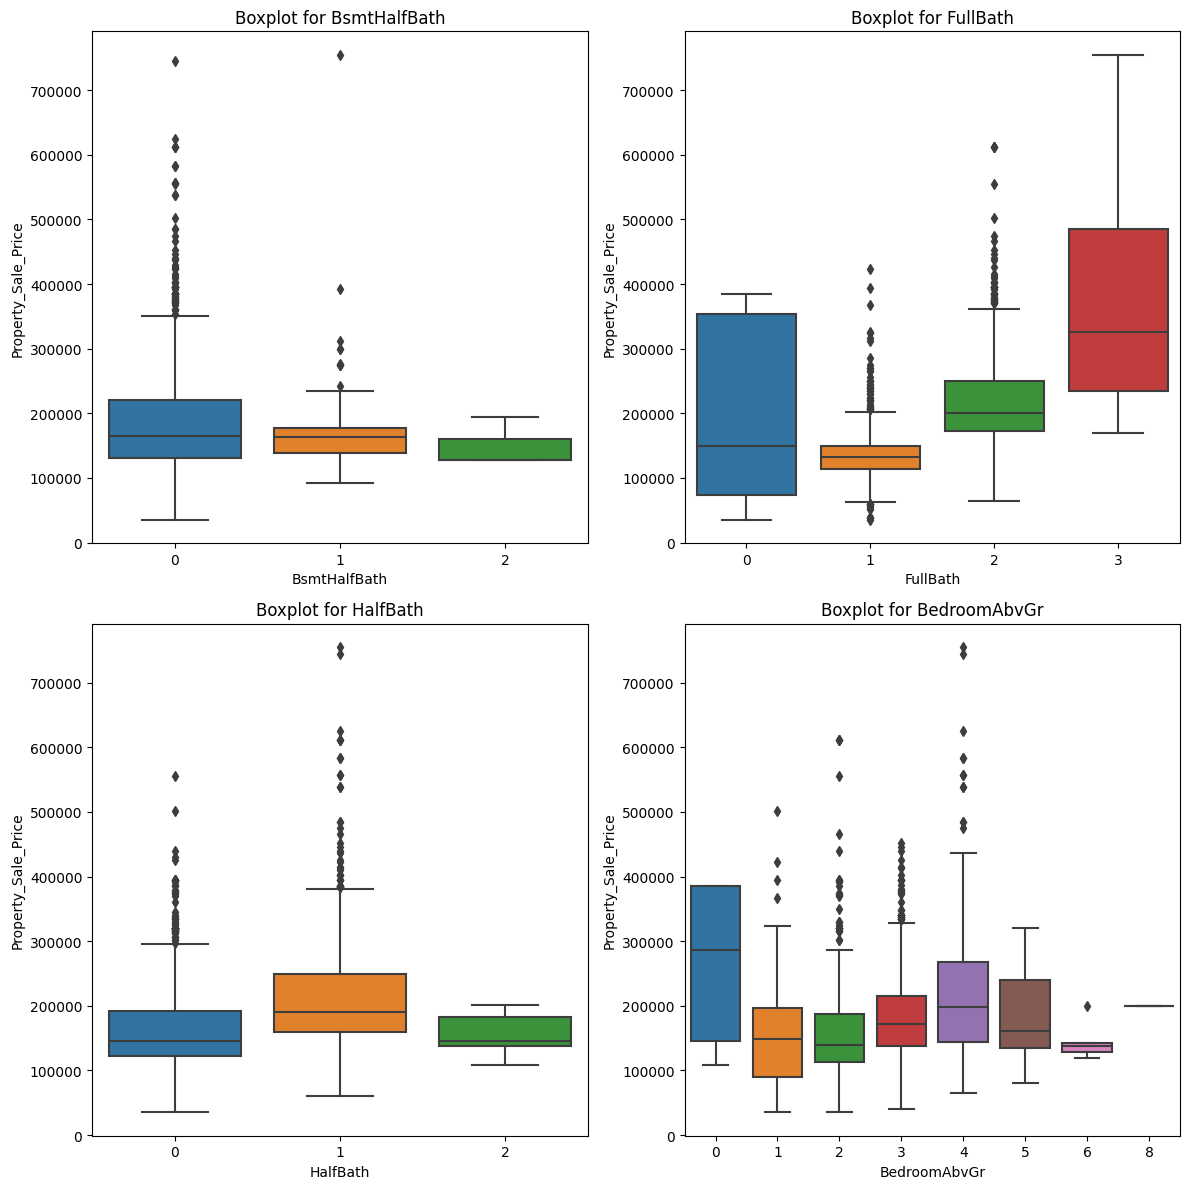

In [110]:
cols = [ 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr']
plt.figure(figsize=(12,12))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[cols[i]],y=df['Property_Sale_Price'])
    plt.title(f'Boxplot for {cols[i]}')

plt.tight_layout()
plt.show()

#### Kitchen, Fireplace, Heating based columns

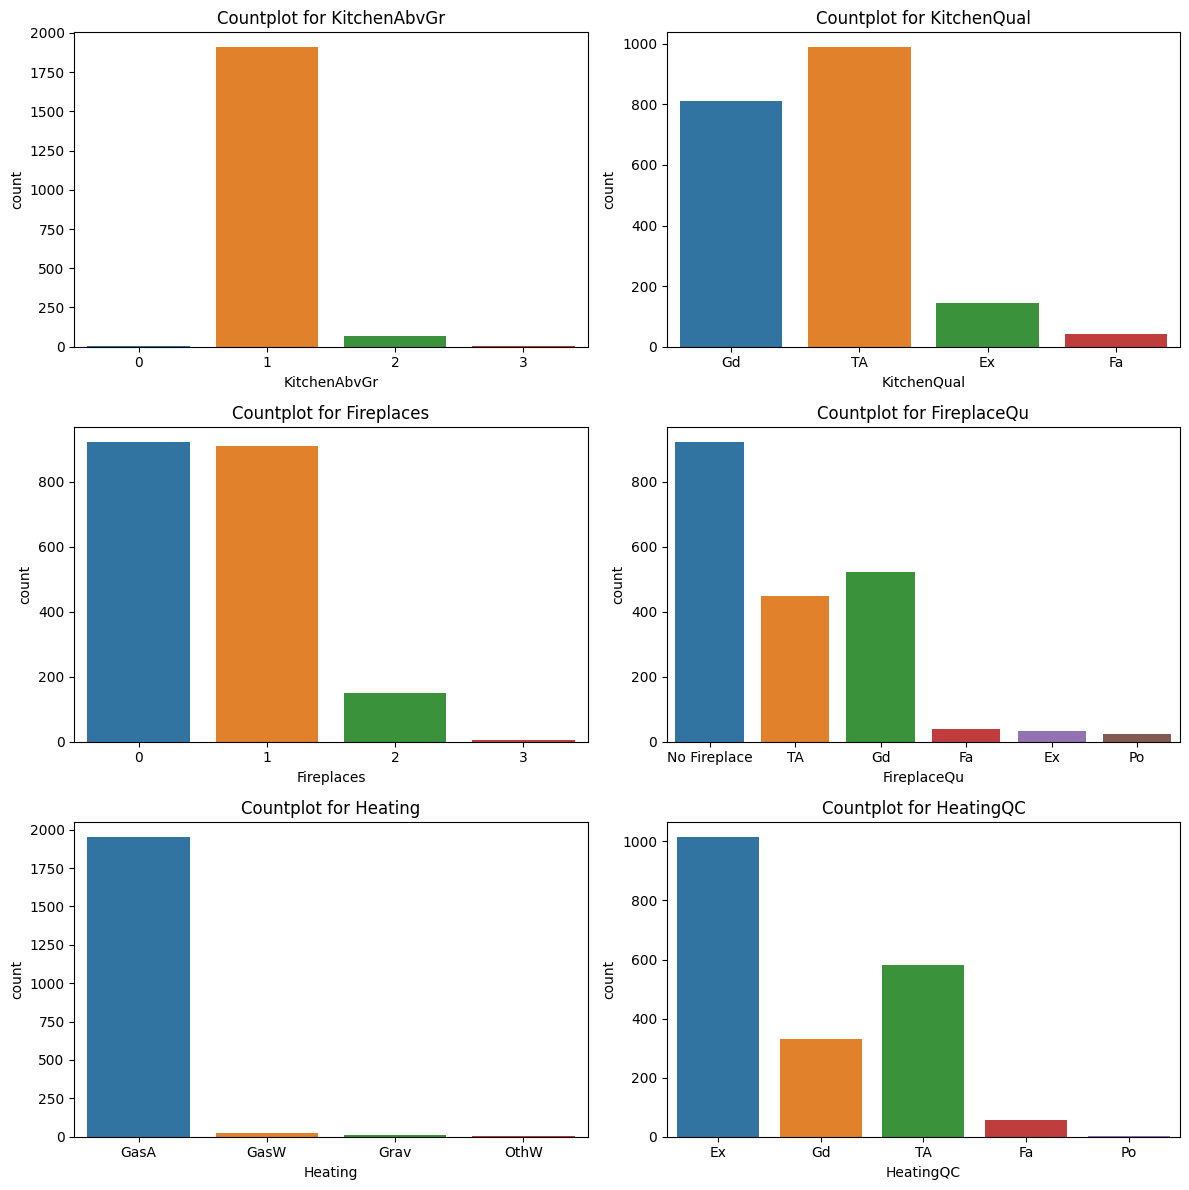

In [111]:
cols = ['KitchenAbvGr', 'KitchenQual','Fireplaces', 'FireplaceQu','Heating',
       'HeatingQC']

plt.figure(figsize=(12,12))
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=df[cols[i]])
    plt.title(f'Countplot for {cols[i]}')

plt.tight_layout()
plt.show()

#### Infernces
1) KitchenAbvGrd can be dropped (as majorty of values are 1).<br>
2) Heating can be dropped (as majorty of values are GasA).

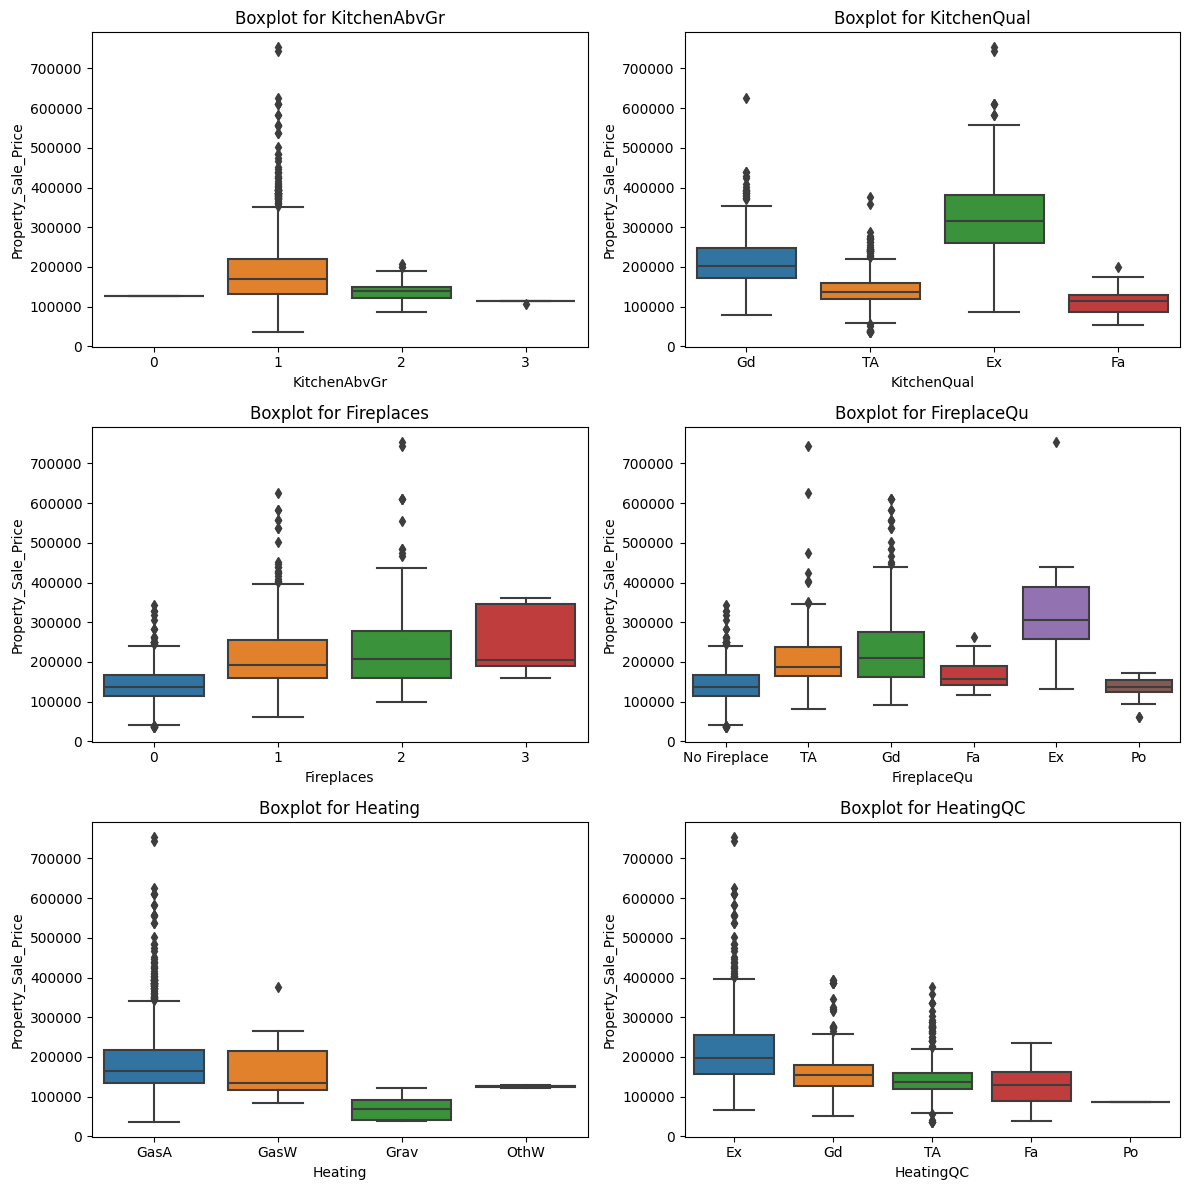

In [112]:
cols = ['KitchenAbvGr', 'KitchenQual','Fireplaces', 'FireplaceQu','Heating',
       'HeatingQC']
plt.figure(figsize=(12,12))
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=df[cols[i]],y=df['Property_Sale_Price'])
    plt.title(f'Boxplot for {cols[i]}')

plt.tight_layout()
plt.show()


#### Analysisng 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type','Property_Shape', 'LandContour',

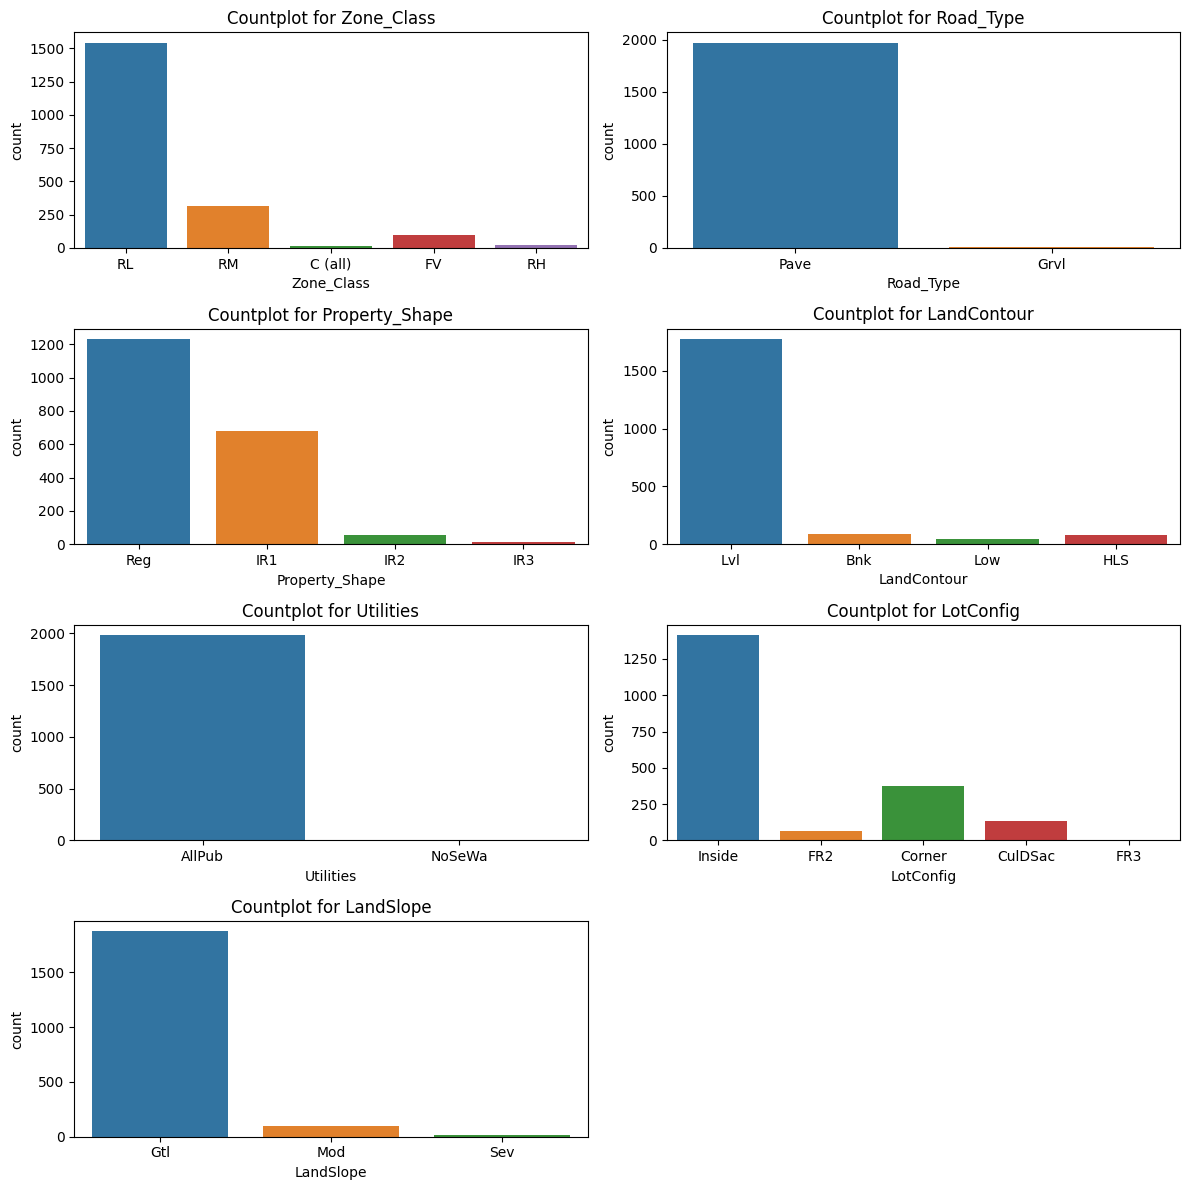

In [113]:
cols = ['Zone_Class', 'Road_Type','Property_Shape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope']
plt.figure(figsize=(12,12))
for i in range(len(cols)):
    plt.subplot(4,2,i+1)
    sns.countplot(x=df[cols[i]])
    plt.title(f'Countplot for {cols[i]}')

plt.tight_layout()
plt.show()

#### Infernces
1) Utilities and Road Type, LandSlope,LandContour can be dropped (as data seems categorilcally skewed)

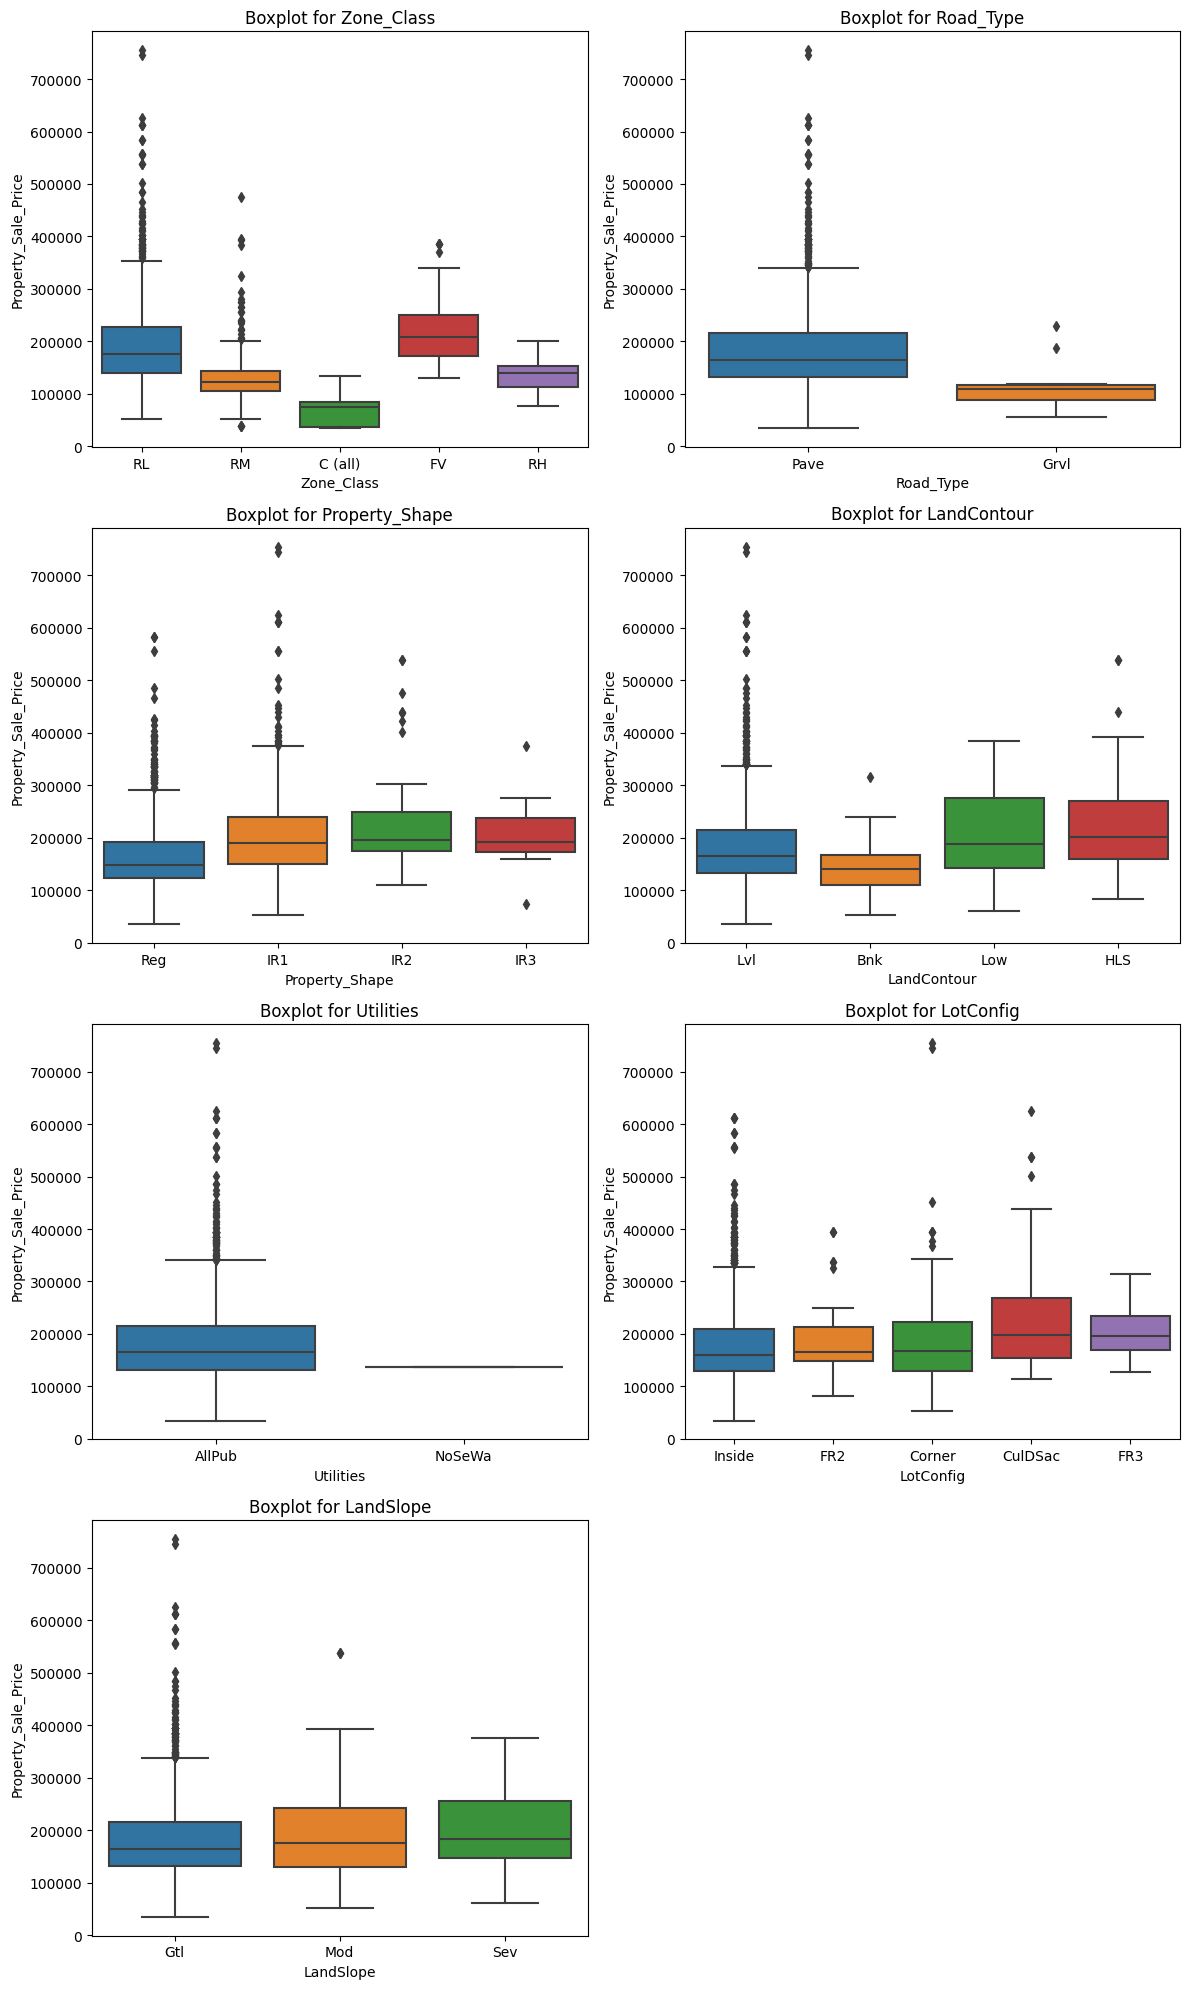

In [114]:
cols = ['Zone_Class', 'Road_Type','Property_Shape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope']
plt.figure(figsize=(12,20))
for i in range(len(cols)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=df[cols[i]],y =df['Property_Sale_Price'])
    plt.title(f'Boxplot for {cols[i]}')

plt.tight_layout()
plt.show()

#### Inferences
LandSlope can be dropped. As there is not significant variation in median Sale_Price

In [115]:
df.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pav

#### Analysing Exterior based features, Electrical and Central Air

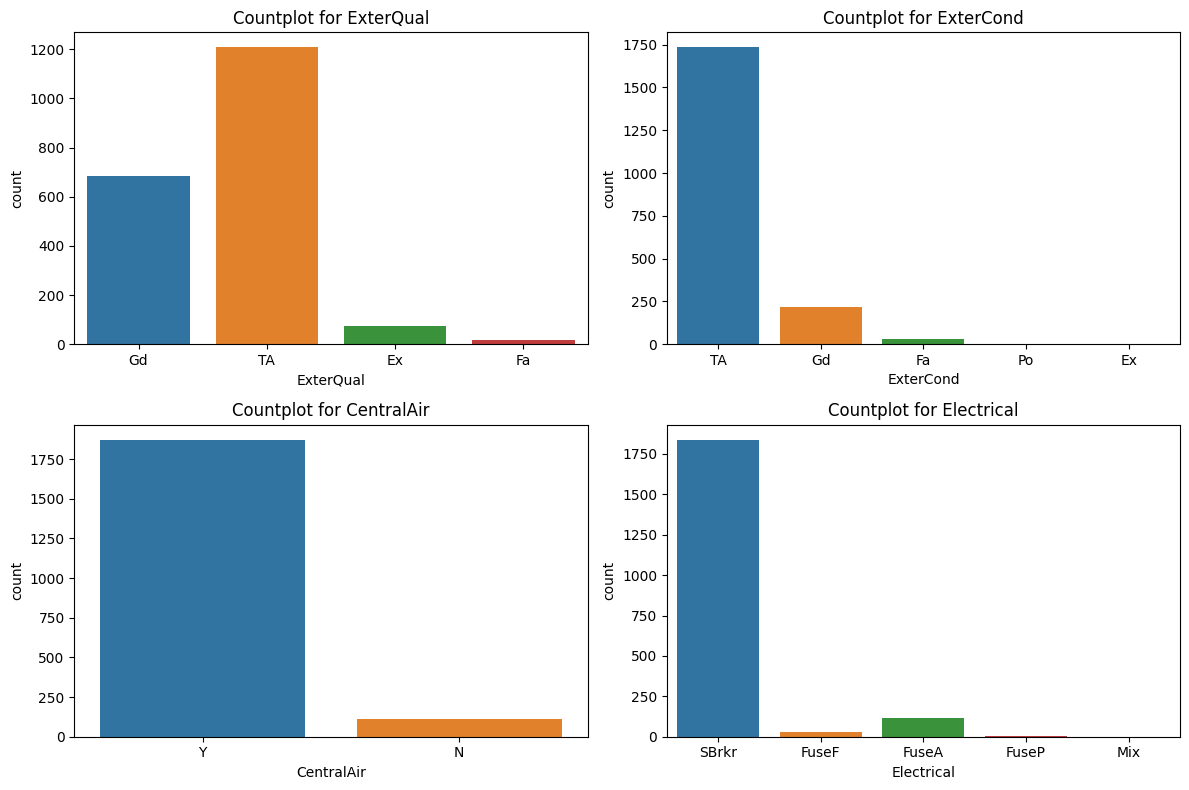

In [116]:
cols = ['ExterQual', 'ExterCond', 'CentralAir','Electrical']
plt.figure(figsize=(12,8))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cols[i]])
    plt.title(f'Countplot for {cols[i]}')

plt.tight_layout()
plt.show()

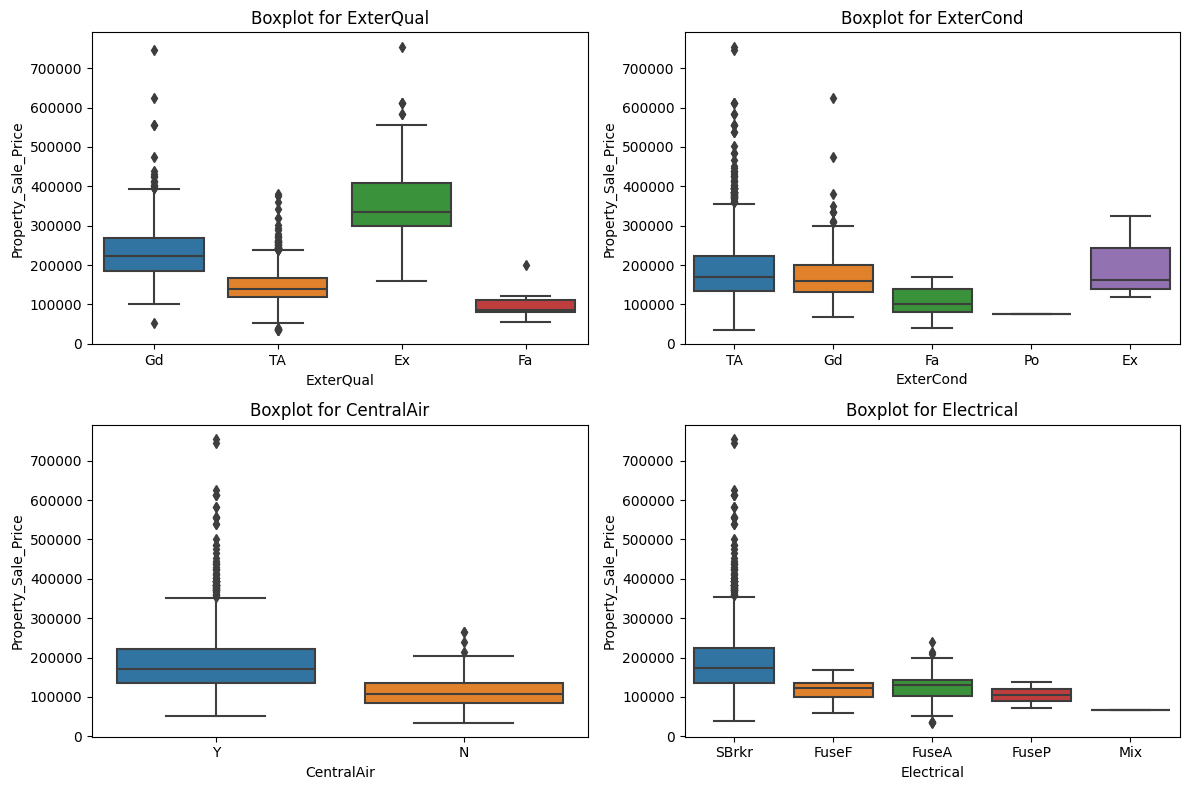

In [117]:
cols = ['ExterQual', 'ExterCond', 'CentralAir', 'Electrical']
plt.figure(figsize=(12,8))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[cols[i]],y=df['Property_Sale_Price'])
    plt.title(f'Boxplot for {cols[i]}')
plt.tight_layout()
plt.show()

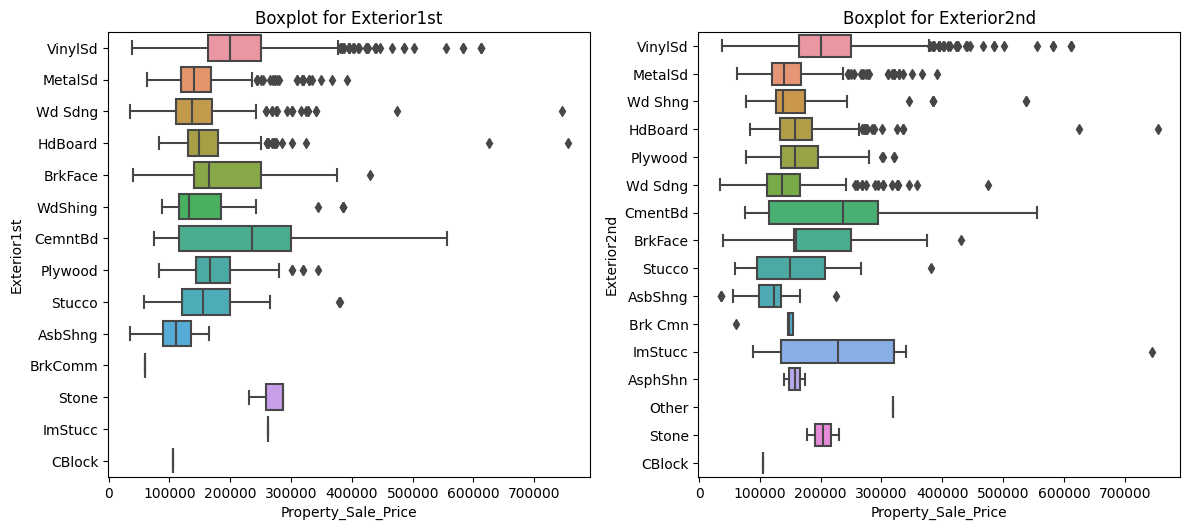

In [118]:
cols = ['Exterior1st', 'Exterior2nd']
plt.figure(figsize=(12,10))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=df[cols[i]],x=df['Property_Sale_Price'])
    plt.title(f'Boxplot for {cols[i]}')
plt.tight_layout()
plt.show()


#### Analysing SaleCondition, SaleType, 'Condition1', 'Condition2', 'Dwelling_Type','HouseStyle', 'OverallQual', 'OverallCond'

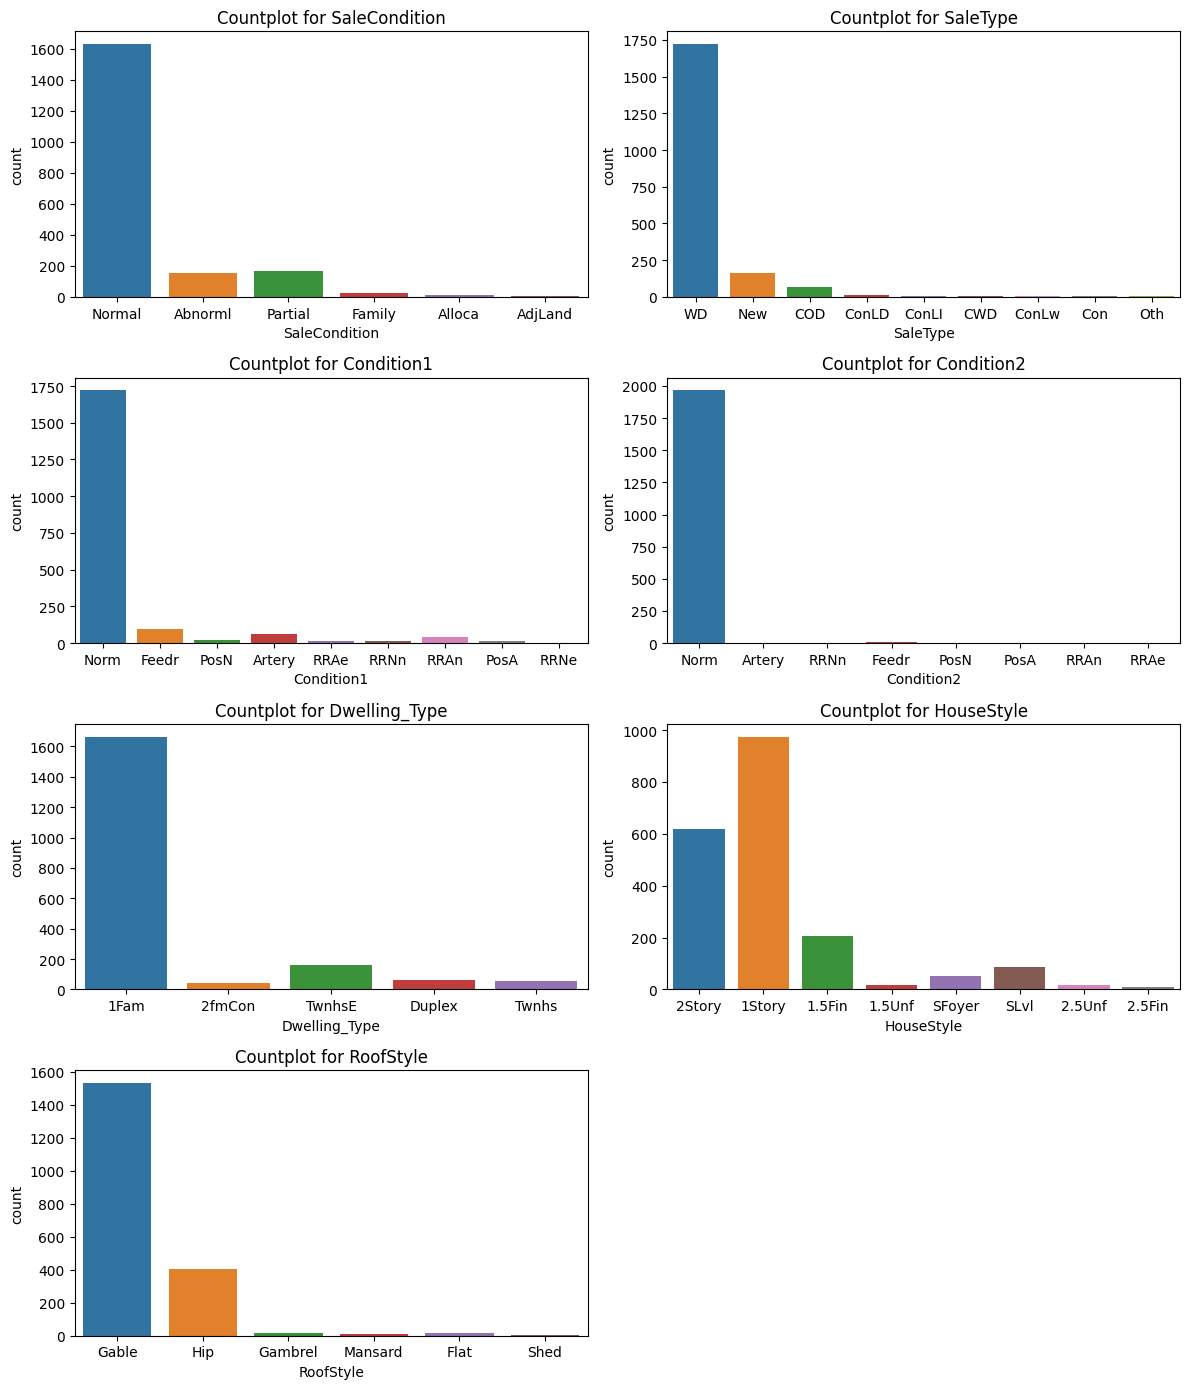

In [119]:
cols = ['SaleCondition', 'SaleType', 'Condition1', 'Condition2', 'Dwelling_Type',
       'HouseStyle','RoofStyle']
plt.figure(figsize=(12,14))
for i in range(len(cols)):
    plt.subplot(4,2,i+1)
    sns.countplot(x=df[cols[i]])
    plt.title(f'Countplot for {cols[i]}')

plt.tight_layout()
plt.show()

#### Inferences
1) Condition2 can be dropped. as Majortity values are Normal.

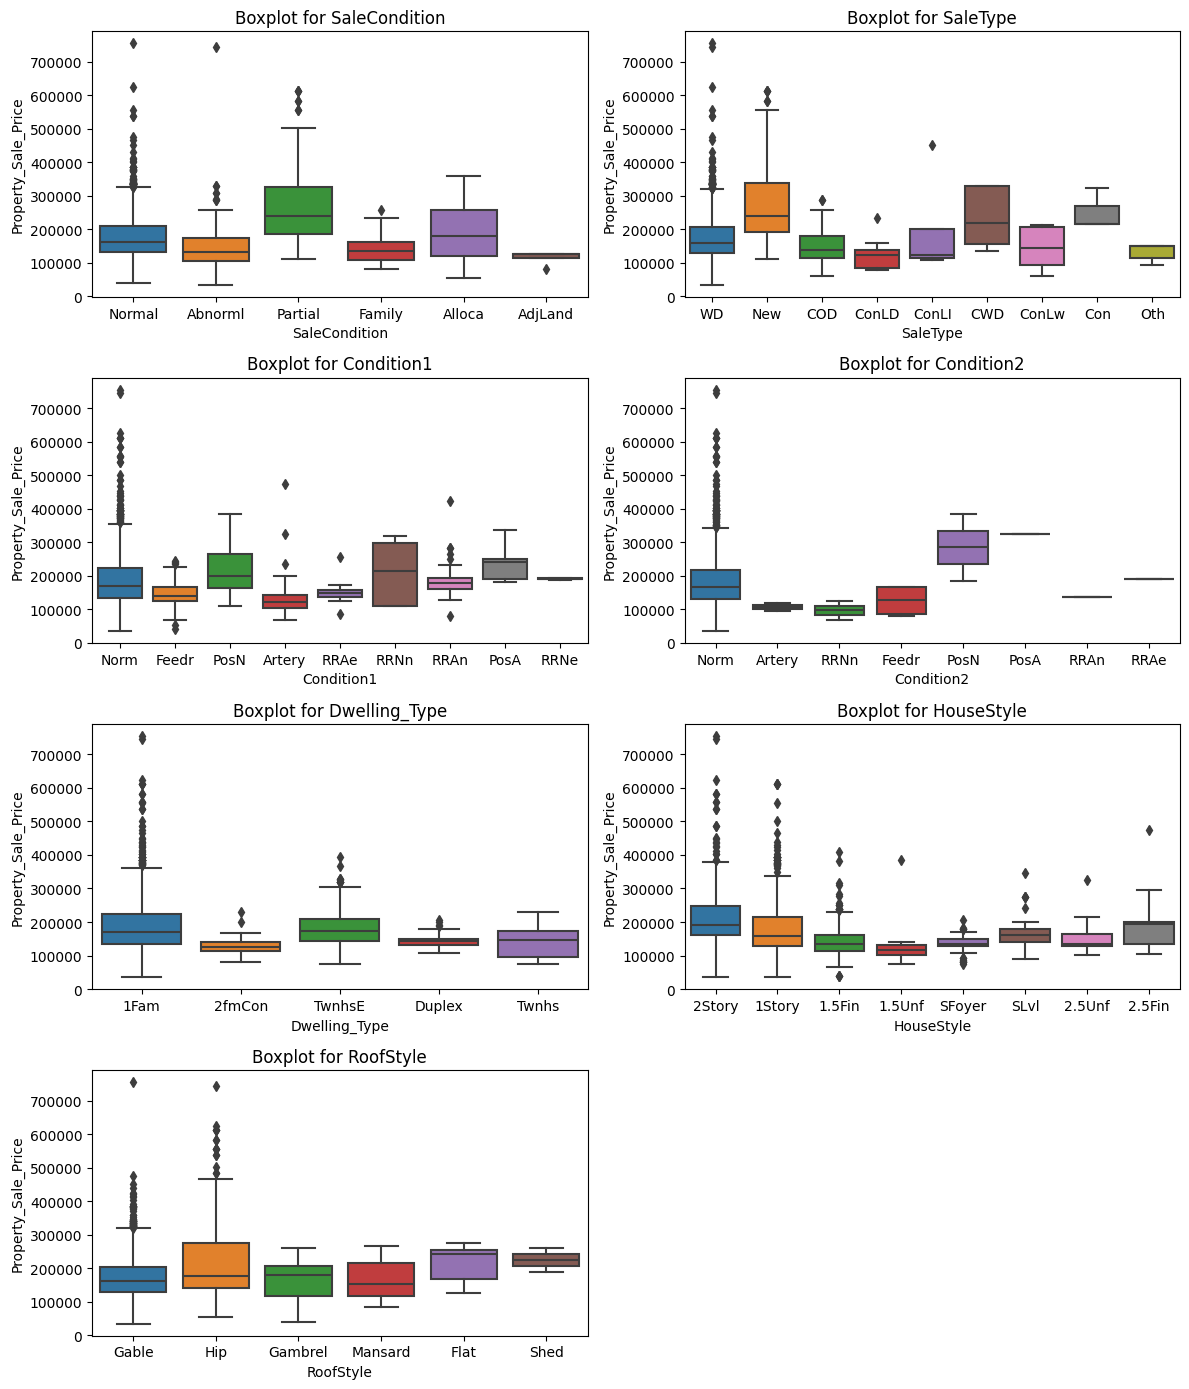

In [120]:
cols = ['SaleCondition', 'SaleType', 'Condition1', 'Condition2', 'Dwelling_Type',
       'HouseStyle','RoofStyle']
plt.figure(figsize=(12,14))
for i in range(len(cols)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=df[cols[i]],y=df['Property_Sale_Price'])
    plt.title(f'Boxplot for {cols[i]}')

plt.tight_layout()
plt.show()

#### Analysing OverallQual, OverAllCond

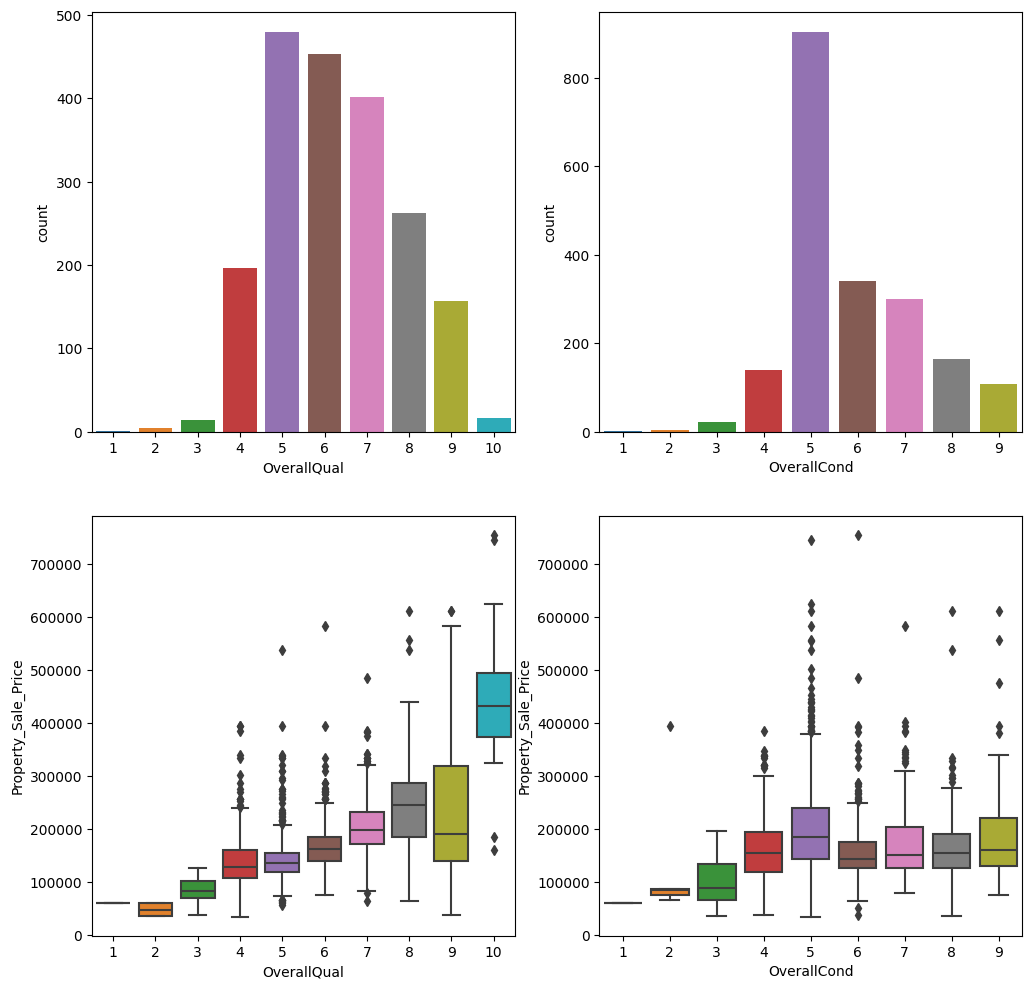

In [121]:
cols = ['OverallQual', 'OverallCond']
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.countplot(x=df['OverallQual'])
plt.subplot(2,2,2)
sns.countplot(x=df['OverallCond'])
plt.subplot(2,2,3)
sns.boxplot(x=df['OverallQual'],y=df['Property_Sale_Price'])
plt.subplot(2,2,4)
sns.boxplot(x=df['OverallCond'],y=df['Property_Sale_Price'])
plt.show()

#### Analysing PavedDrive', 'MasVnrType', 'PoolArea',

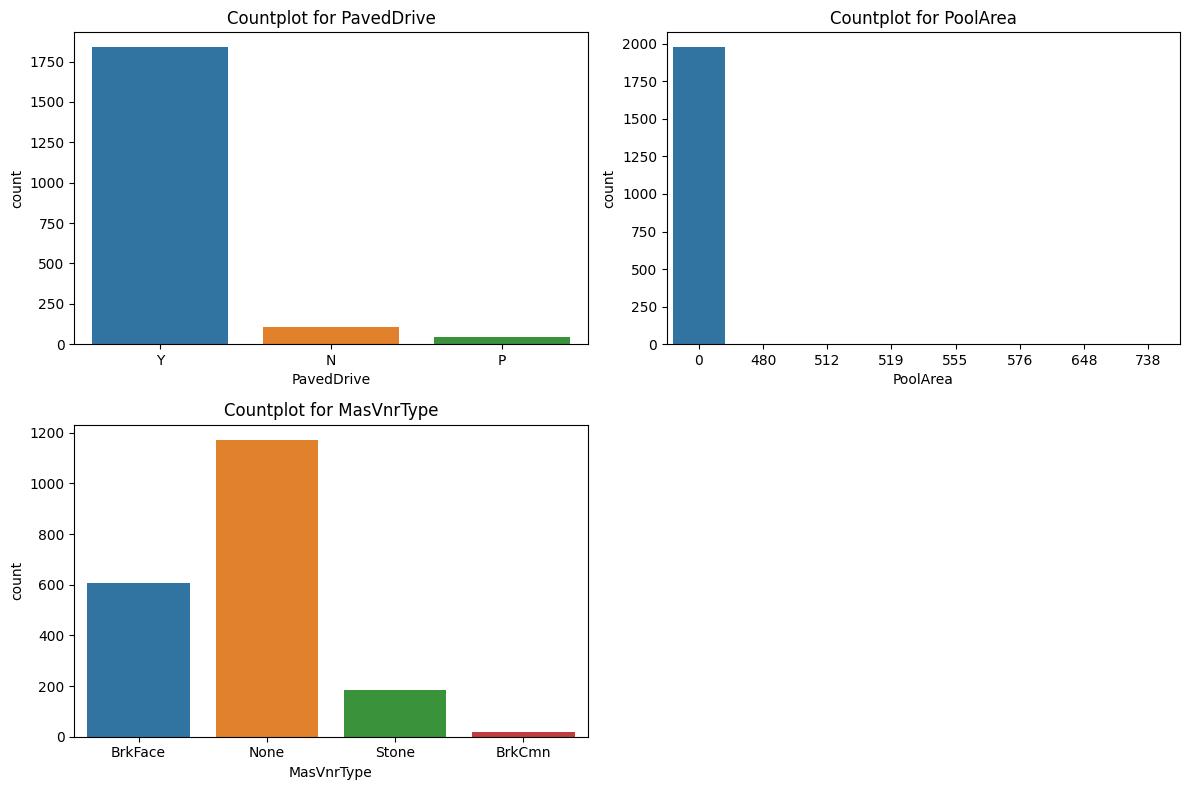

In [122]:
cols = ['PavedDrive', 'PoolArea','MasVnrType']
plt.figure(figsize=(12,8))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cols[i]])
    plt.title(f'Countplot for {cols[i]}')

plt.tight_layout()
plt.show()

#### Inferncees
1) PoolArea can be dropped.

In [123]:
cols_analysied_so_far = ['KitchenAbvGr', 'KitchenQual','Fireplaces', 'FireplaceQu','Heating',
       'HeatingQC', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr',
        'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','BsmtQual','BsmtCond',
        'BsmtExposure', 'BsmtFinType1','BsmtFinType2',
        'GarageType', 'GarageFinish', 'GarageCars','GarageQual','GarageCond',
        'Zone_Class', 'Road_Type','Property_Shape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope','ExterQual', 'ExterCond', 'CentralAir',
        'Electrical','Exterior1st', 'Exterior2nd','SaleCondition', 'SaleType', 'Condition1',
        'Condition2', 'Dwelling_Type','HouseStyle','RoofStyle','OverallQual', 'OverallCond',
        'PavedDrive', 'PoolArea','MasVnrType']
len(cols_analysied_so_far)

49

In [124]:
cols = ['WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch','MiscVal']
for i in cols:
    print(i,df[i].dtypes,df[i].nunique())

WoodDeckSF int64 273
OpenPorchSF int64 201
EnclosedPorch int64 117
3SsnPorch int64 20
ScreenPorch int64 76
MiscVal int64 20


#### Analysing Year based features

In [125]:
cols = ['YearBuilt', 'YearRemodAdd','GarageYrBlt','YrSold','MoSold']
for i in cols:
    print(df[i].dtypes,df[i].nunique())

int64 116
int64 72
float64 102
int64 5
int64 12


In [126]:
df[cols].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold  MoSold
0       2003          2003       2003.0    2008       2
1       1976          1976       1976.0    2007       5
2       2001          2002       2001.0    2008       9
3       1915          1970       1998.0    2006       2
4       2000          2000       2000.0    2008      12

In [127]:
df['House_Age'] = 2023 - df['YearBuilt']
df['House_Age_Since_sold'] = 2023 - df['YrSold']

In [128]:
df['House_Age'].value_counts()

18     98
17     81
19     63
16     56
46     52
       ..
151     1
125     1
130     1
110     1
117     1
Name: House_Age, Length: 116, dtype: int64

#### Correlation

In [129]:
num_cols = df.dtypes[df.dtypes!='object'].index
print(num_cols)
print(len(num_cols))

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price', 'House_Age',
       'House_Age_Since_sold'],
      dtype='object')
40


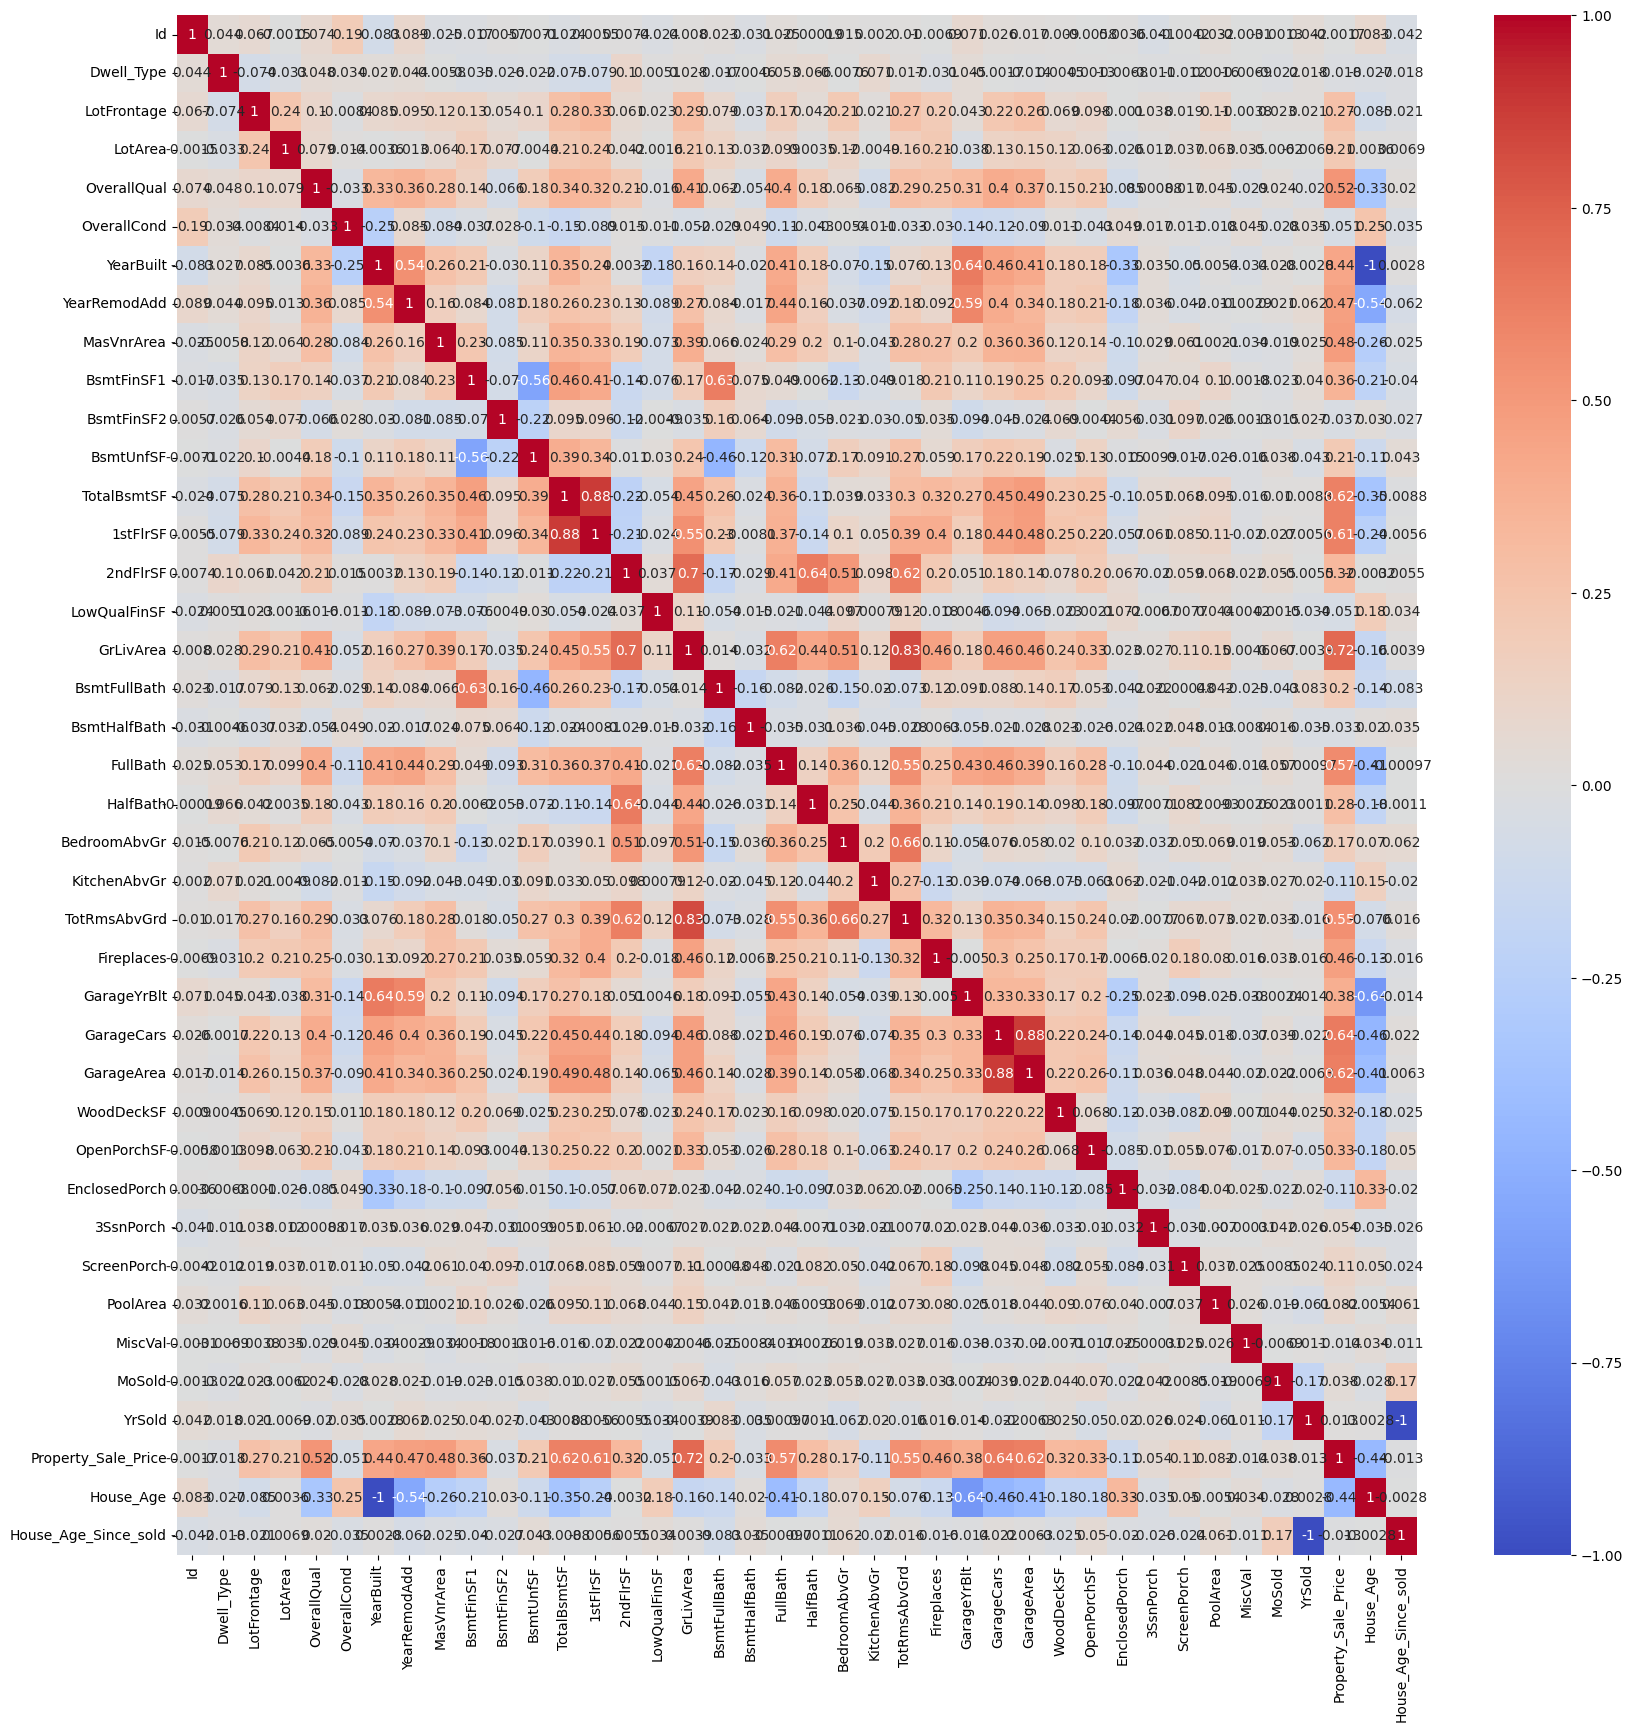

In [75]:
corr  = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.show()

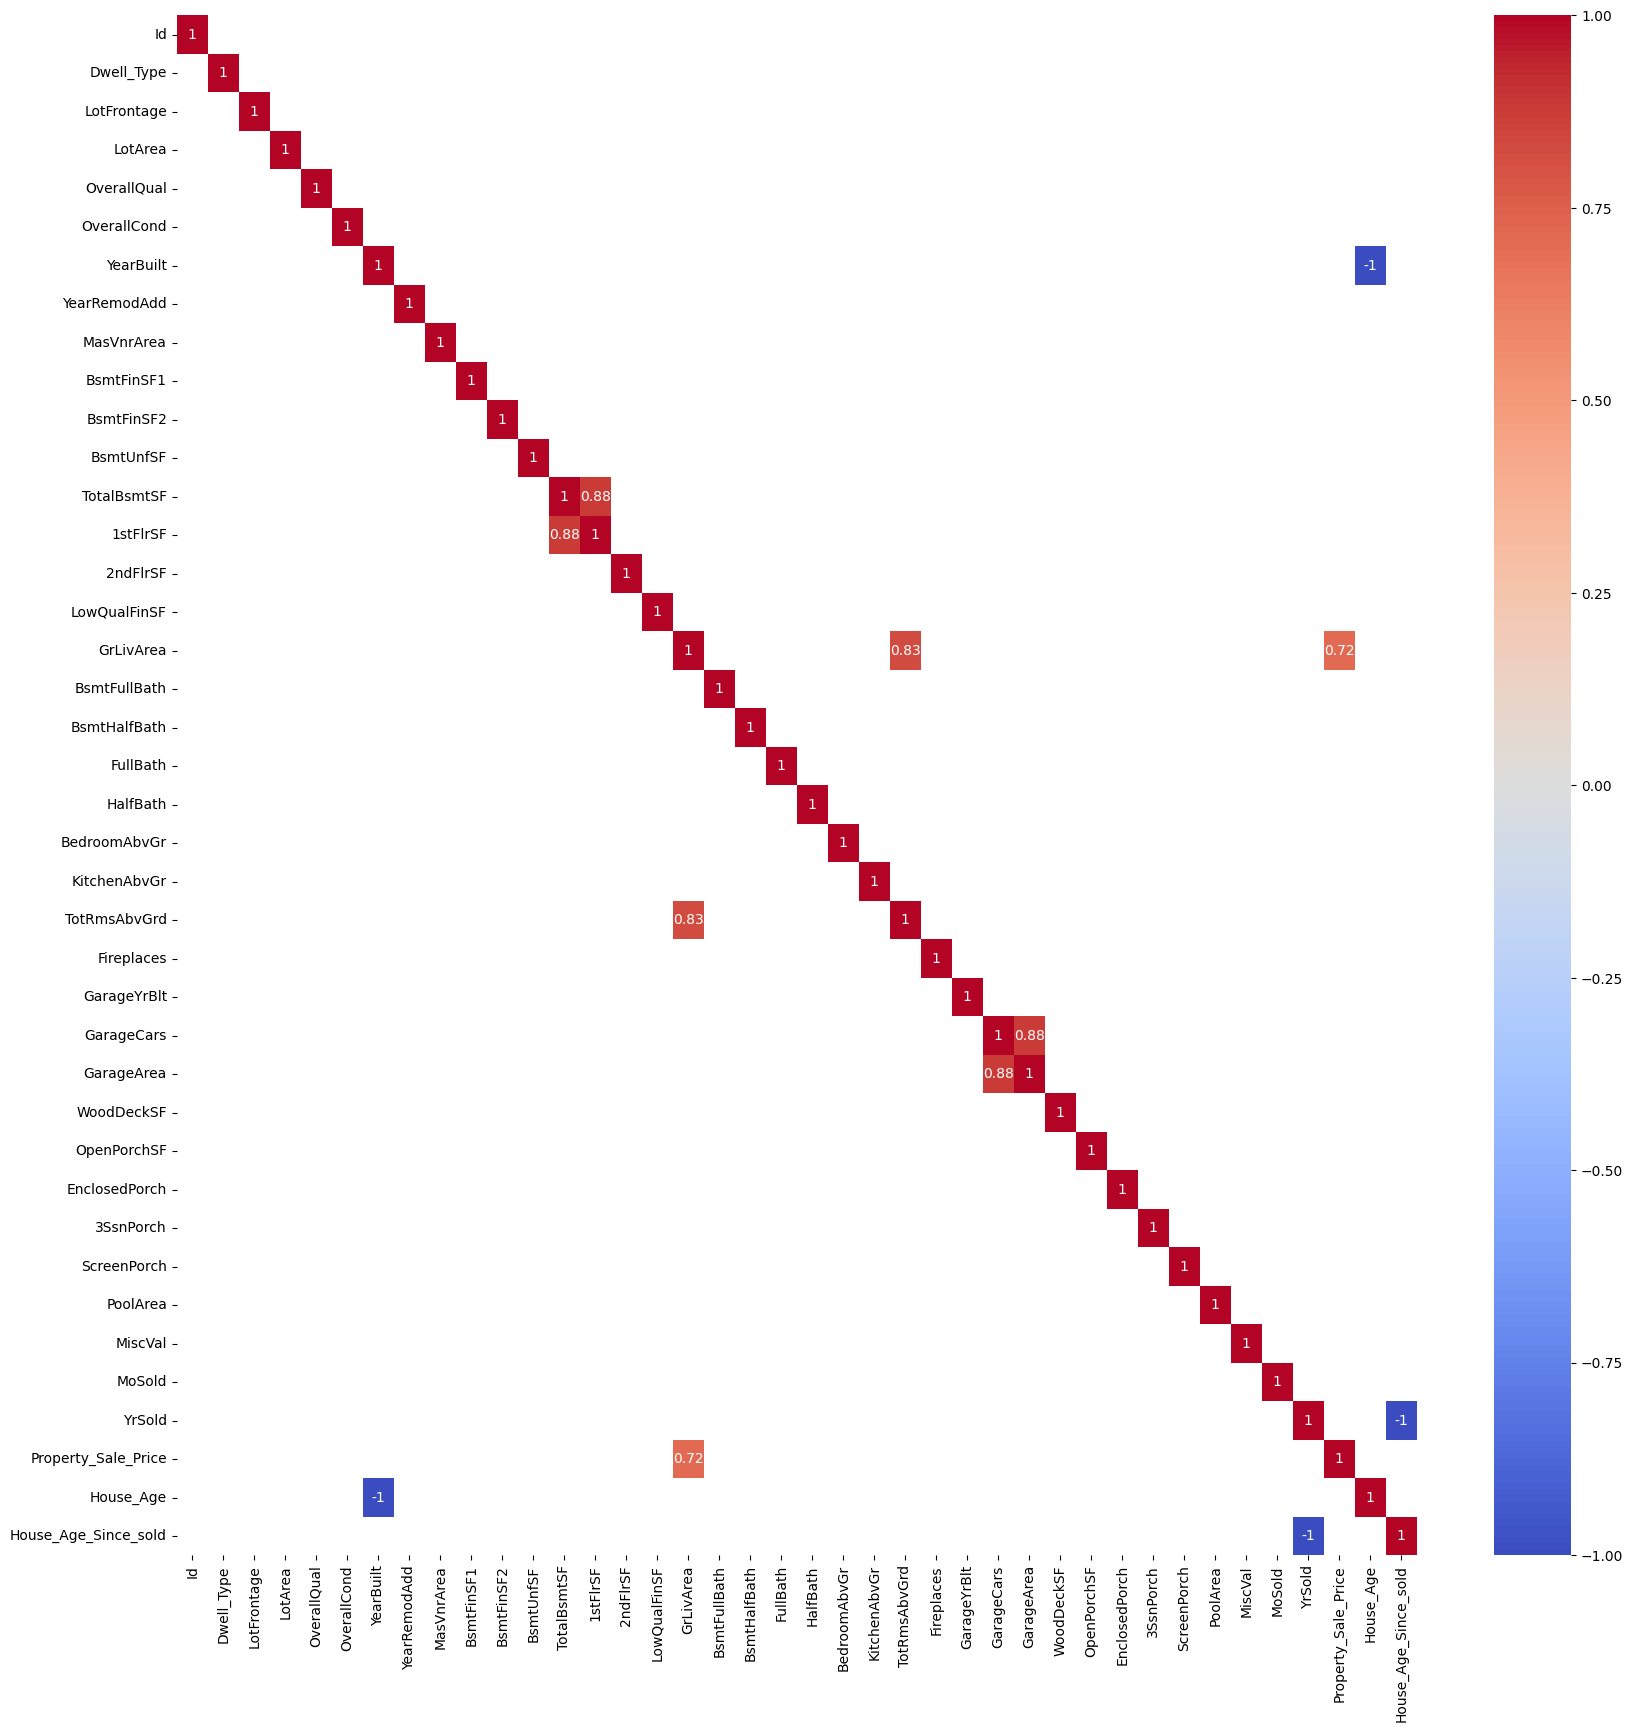

In [76]:
corr  = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr[abs(corr)>=0.7],cmap='coolwarm',annot=True)
plt.show()

### Inference
1) TotalBsmtSF and 1stFlrSF are highly correlated.<br>
2) GarageCars and GarageArea are highly correlated.<br>
3) GrLivArea and TotalRmsAbvGrd are highly correlated.<br>

In [130]:
df.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pav

In [131]:
num_cols

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price', 'House_Age',
       'House_Age_Since_sold'],
      dtype='object')

#### Pairplot for Numerical featrues

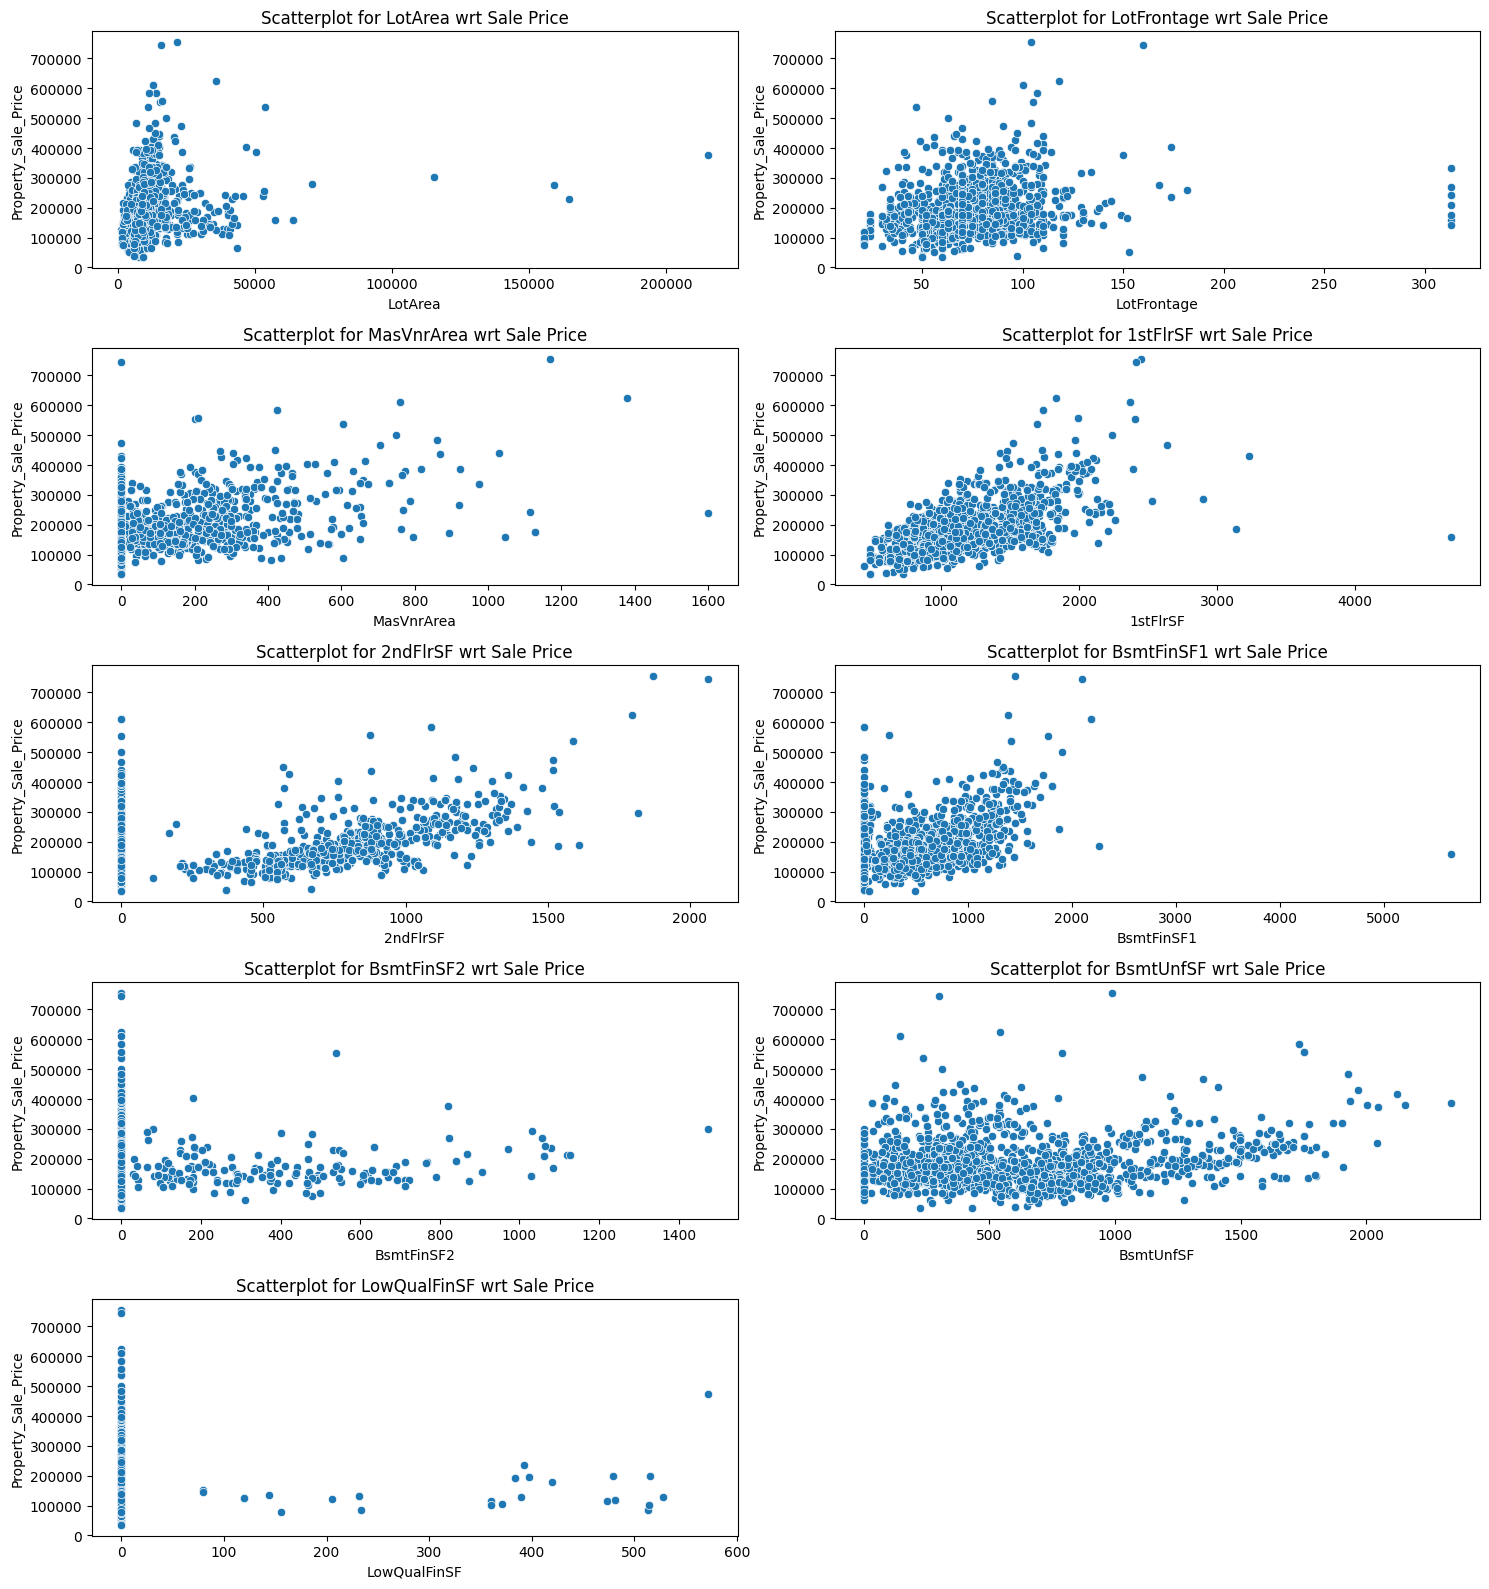

In [132]:
num_cols1 = ['LotArea','LotFrontage','MasVnrArea','1stFlrSF','2ndFlrSF','BsmtFinSF1',
       'BsmtFinSF2','BsmtUnfSF','LowQualFinSF']

plt.figure(figsize=(15,16))
for i in range(len(num_cols1)):
    plt.subplot(5,2,i+1)
    sns.scatterplot(x=df[num_cols1[i]],y=df['Property_Sale_Price'])
    plt.title(f'Scatterplot for {num_cols1[i]} wrt Sale Price')
plt.tight_layout()
plt.show()

#### Inference
1) LowQualFinSF and BsmtFinSF2 can be dropped.

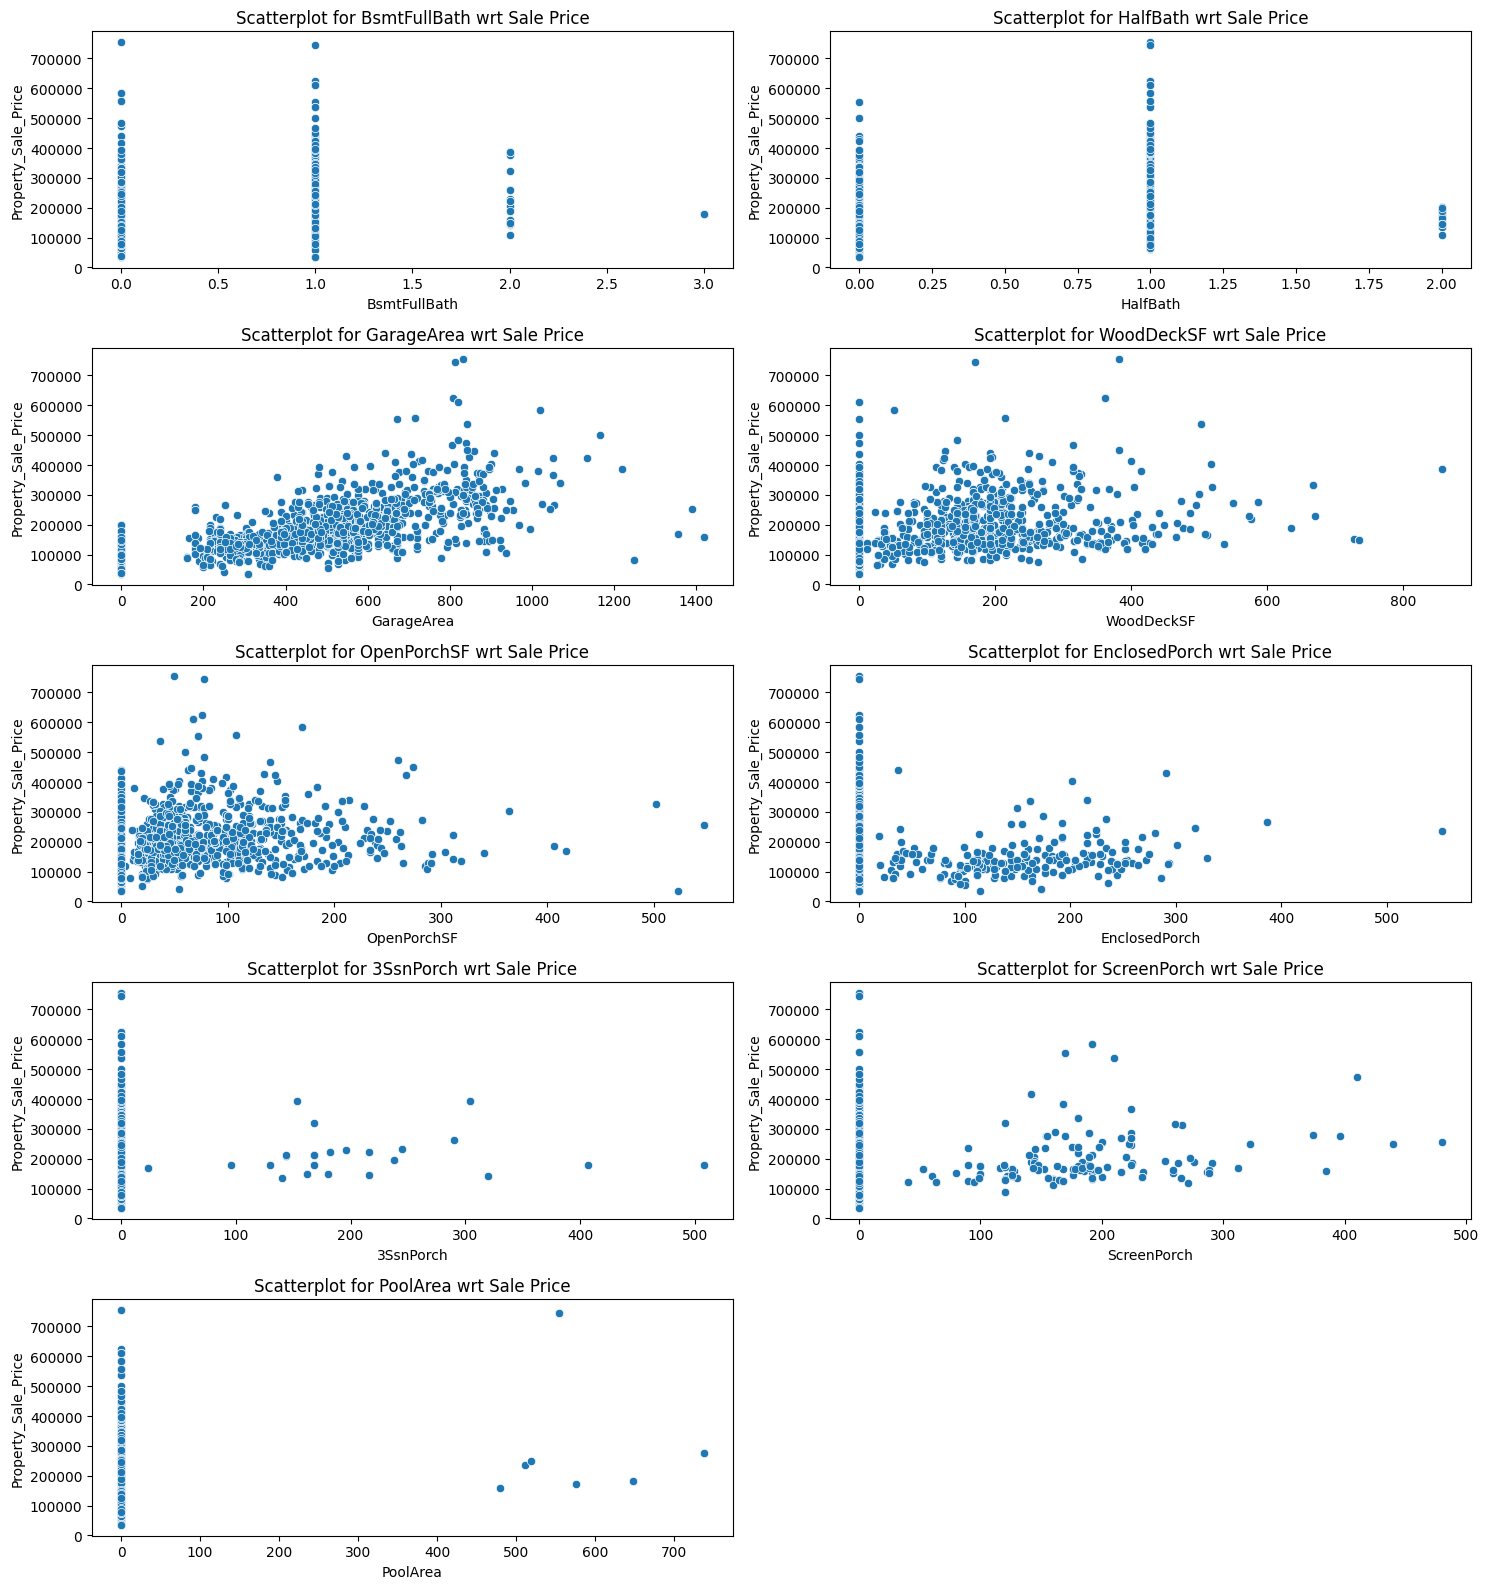

In [133]:
num_cols2 = ['BsmtFullBath','HalfBath','GarageArea','WoodDeckSF','OpenPorchSF',
             'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']

plt.figure(figsize=(15,16))
for i in range(len(num_cols2)):
    plt.subplot(5,2,i+1)
    sns.scatterplot(x=df[num_cols2[i]],y=df['Property_Sale_Price'])
    plt.title(f'Scatterplot for {num_cols2[i]} wrt Sale Price')
plt.tight_layout()
plt.show()

#### Inferecne
1) 3SnPorch and PoolArea can be dropped.

#### Drop Redundant Features

In [134]:
df1 = df.copy()

In [135]:
cols_to_drop = ['GarageCond','BsmtHalfBath','KitchenAbvGr','Heating','PoolArea','Road_Type',
                'Utilities','LandSlope','Condition2','LowQualFinSF','BsmtFinSF2','3SsnPorch',
                'TotalBsmtSF','GarageCars','TotRmsAbvGrd']
df.drop(cols_to_drop,axis=1,inplace=True)
df.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea',
       'Property_Shape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'Dwelling_Type', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageArea', 'GarageQual', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'Property_Sale_Price',
       'House_Age', 'House_Age_Since_s

In [136]:
df.shape

(1985, 64)

#### Outlier Treatment

In [137]:
a = df.describe(percentiles=[0.01,0.02,0.03,0.05]).T
a = a.iloc[:,3:]
a

min        1%        2%        3%       5%  \
Id                        1.0     21.84     42.68     62.52    104.2   
Dwell_Type               20.0     20.00     20.00     20.00     20.0   
LotFrontage              21.0     21.00     24.00     31.04     36.0   
LotArea                1300.0   1838.76   2217.00   2610.72   3610.2   
OverallQual               1.0      4.00      4.00      4.00      4.0   
OverallCond               1.0      3.00      4.00      4.00      4.0   
YearBuilt              1872.0   1900.00   1905.68   1910.00   1915.2   
YearRemodAdd           1950.0   1950.00   1950.00   1950.00   1950.0   
MasVnrArea                0.0      0.00      0.00      0.00      0.0   
BsmtFinSF1                0.0      0.00      0.00      0.00      0.0   
BsmtUnfSF                 0.0      0.00      0.00      0.00      0.0   
1stFlrSF                438.0    546.00    612.00    630.00    684.4   
2ndFlrSF                  0.0      0.00      0.00      0.00      0.0   
GrLivArea               438.0    693.84    768.00    804.00    848.0   
BsmtFullBath              0.0      0.00      0.00      0.00      0.0   
FullBath                  0.0      1.00      1.00      1.00      1.0   
HalfBath                  0.0      0.00      0.00      0.00      0.0   
BedroomAbvGr              0.0      1.00      1.00      1.00      2.0   
Fireplaces                0.0      0.00      0.00      0.00      0.0   
GarageYrBlt            1906.0   1920.00   1922.00   1925.00   1934.2   
GarageArea                0.0      0.00      0.00      0.00      0.0   
WoodDeckSF                0.0      0.00      0.00      0.00      0.0   
OpenPorchSF               0.0      0.00      0.00      0.00      0.0   
EnclosedPorch             0.0      0.00      0.00      0.00      0.0   
ScreenPorch               0.0      0.00      0.00      0.00      0.0   
MiscVal                   0.0      0.00      0.00      0.00      0.0   
MoSold                    1.0      1.00      1.00      1.00      2.0   
YrSold                 2006.0   2006.00   2006.00   2006.00   2006.0   
Property_Sale_Price   34900.0  64500.00  79340.00  83000.00  91000.0   
House_Age                13.0     14.00     15.00     16.00     16.0   
House_Age_Since_sold     13.0     13.00     13.00     13.00     13.0   

                           50%       max  
Id                       931.0    1820.0  
Dwell_Type                50.0    7080.0  
LotFrontage               70.0     313.0  
LotArea                 9500.0  215245.0  
OverallQual                6.0      10.0  
OverallCond                5.0       9.0  
YearBuilt               1972.0    2010.0  
YearRemodAdd            1995.0    2023.0  
MasVnrArea                 0.0    1600.0  
BsmtFinSF1               399.0    5644.0  
BsmtUnfSF                486.0    2336.0  
1stFlrSF                1095.0    4692.0  
2ndFlrSF                   0.0    2065.0  
GrLivArea               1472.0    5642.0  
BsmtFullBath               0.0       3.0  
FullBath                   2.0       3.0  
HalfBath                   0.0       2.0  
BedroomAbvGr               3.0       8.0  
Fireplaces                 1.0       3.0  
GarageYrBlt             1989.0    2019.0  
GarageArea               480.0    1418.0  
WoodDeckSF                 0.0     857.0  
OpenPorchSF               27.0     547.0  
EnclosedPorch              0.0     552.0  
ScreenPorch                0.0     480.0  
MiscVal                    0.0   15500.0  
MoSold                     6.0      12.0  
YrSold                  2008.0    2010.0  
Property_Sale_Price   165000.0  755000.0  
House_Age                 51.0     151.0  
House_Age_Since_sold      15.0      17.0

In [138]:
left_skewed_cols = ['LotArea','1stFlrSF','GrLivArea','Property_Sale_Price']

def left_skewed_outlier_treatment(x):
    x = x.clip(lower=x.quantile(0.01))
    return x

In [139]:
a = df.describe(percentiles=[0.95,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

min       50%       95%        97%        98%  \
Id                        1.0     931.0    1716.8    1758.48    1779.32   
Dwell_Type               20.0      50.0     160.0     160.00     190.00   
LotFrontage              21.0      70.0     107.0     115.48     121.32   
LotArea                1300.0    9500.0   19679.4   25735.80   31398.04   
OverallQual               1.0       6.0       9.0       9.00       9.00   
OverallCond               1.0       5.0       9.0       9.00       9.00   
YearBuilt              1872.0    1972.0    2007.0    2007.00    2008.00   
YearRemodAdd           1950.0    1995.0    2008.0    2009.00    2012.64   
MasVnrArea                0.0       0.0     450.0     576.00     655.24   
BsmtFinSF1                0.0     399.0    1248.6    1359.44    1440.00   
BsmtUnfSF                 0.0     486.0    1496.8    1632.00    1709.32   
1stFlrSF                438.0    1095.0    1827.6    1951.20    2058.12   
2ndFlrSF                  0.0       0.0    1149.2    1242.48    1320.00   
GrLivArea               438.0    1472.0    2452.0    2626.88    2777.88   
BsmtFullBath              0.0       0.0       1.0       1.00       1.00   
FullBath                  0.0       2.0       2.0       2.00       2.00   
HalfBath                  0.0       0.0       1.0       1.00       1.00   
BedroomAbvGr              0.0       3.0       4.0       4.00       4.00   
Fireplaces                0.0       1.0       2.0       2.00       2.00   
GarageYrBlt            1906.0    1989.0    2008.0    2008.00    2009.00   
GarageArea                0.0     480.0     856.0     888.00     905.00   
WoodDeckSF                0.0       0.0     348.0     400.96     453.76   
OpenPorchSF               0.0      27.0     174.0     208.96     240.32   
EnclosedPorch             0.0       0.0     169.8     216.00     231.28   
ScreenPorch               0.0       0.0     168.0     194.40     220.00   
MiscVal                   0.0       0.0       0.0     400.00     500.00   
MoSold                    1.0       6.0      11.0      12.00      12.00   
YrSold                 2006.0    2008.0    2010.0    2010.00    2010.00   
Property_Sale_Price   34900.0  165000.0  328900.0  371609.52  393118.24   
House_Age                13.0      51.0     107.8     113.00     117.32   
House_Age_Since_sold     13.0      15.0      17.0      17.00      17.00   

                            99%       max  
Id                      1800.16    1820.0  
Dwell_Type               190.00    7080.0  
LotFrontage              141.48     313.0  
LotArea                40939.56  215245.0  
OverallQual                9.00      10.0  
OverallCond                9.00       9.0  
YearBuilt               2009.00    2010.0  
YearRemodAdd            2017.00    2023.0  
MasVnrArea               789.28    1600.0  
BsmtFinSF1              1578.28    5644.0  
BsmtUnfSF               1800.00    2336.0  
1stFlrSF                2217.00    4692.0  
2ndFlrSF                1414.00    2065.0  
GrLivArea               3082.64    5642.0  
BsmtFullBath               2.00       3.0  
FullBath                   3.00       3.0  
HalfBath                   1.00       2.0  
BedroomAbvGr               5.00       8.0  
Fireplaces                 2.00       3.0  
GarageYrBlt             2010.00    2019.0  
GarageArea               998.04    1418.0  
WoodDeckSF               521.72     857.0  
OpenPorchSF              285.32     547.0  
EnclosedPorch            254.80     552.0  
ScreenPorch              263.32     480.0  
MiscVal                  700.00   15500.0  
MoSold                    12.00      12.0  
YrSold                  2010.00    2010.0  
Property_Sale_Price   441001.76  755000.0  
House_Age                123.00     151.0  
House_Age_Since_sold      17.00      17.0

In [140]:
right_skewed_cols = ['Dwell_Type','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1',
                     'BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea',
                     'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch',
                     'MiscVal','Property_Sale_Price']

def right_skewed_outlier_treatment(x):
    x = x.clip(upper=x.quantile(0.99))
    return x

In [141]:
df[left_skewed_cols] = df[left_skewed_cols].apply(left_skewed_outlier_treatment)
df[right_skewed_cols] = df[right_skewed_cols].apply(right_skewed_outlier_treatment)

In [142]:
a = df.describe(percentiles=[0.01,0.02,0.03,0.05]).T
a = a.iloc[:,3:]
a

min          1%        2%        3%       5%  \
Id                        1.00     21.8400     42.68     62.52    104.2   
Dwell_Type               20.00     20.0000     20.00     20.00     20.0   
LotFrontage              21.00     21.0000     24.00     31.04     36.0   
LotArea                1838.76   1864.1616   2217.00   2610.72   3610.2   
OverallQual               1.00      4.0000      4.00      4.00      4.0   
OverallCond               1.00      3.0000      4.00      4.00      4.0   
YearBuilt              1872.00   1900.0000   1905.68   1910.00   1915.2   
YearRemodAdd           1950.00   1950.0000   1950.00   1950.00   1950.0   
MasVnrArea                0.00      0.0000      0.00      0.00      0.0   
BsmtFinSF1                0.00      0.0000      0.00      0.00      0.0   
BsmtUnfSF                 0.00      0.0000      0.00      0.00      0.0   
1stFlrSF                546.00    546.0000    612.00    630.00    684.4   
2ndFlrSF                  0.00      0.0000      0.00      0.00      0.0   
GrLivArea               693.84    693.9744    768.00    804.00    848.0   
BsmtFullBath              0.00      0.0000      0.00      0.00      0.0   
FullBath                  0.00      1.0000      1.00      1.00      1.0   
HalfBath                  0.00      0.0000      0.00      0.00      0.0   
BedroomAbvGr              0.00      1.0000      1.00      1.00      2.0   
Fireplaces                0.00      0.0000      0.00      0.00      0.0   
GarageYrBlt            1906.00   1920.0000   1922.00   1925.00   1934.2   
GarageArea                0.00      0.0000      0.00      0.00      0.0   
WoodDeckSF                0.00      0.0000      0.00      0.00      0.0   
OpenPorchSF               0.00      0.0000      0.00      0.00      0.0   
EnclosedPorch             0.00      0.0000      0.00      0.00      0.0   
ScreenPorch               0.00      0.0000      0.00      0.00      0.0   
MiscVal                   0.00      0.0000      0.00      0.00      0.0   
MoSold                    1.00      1.0000      1.00      1.00      2.0   
YrSold                 2006.00   2006.0000   2006.00   2006.00   2006.0   
Property_Sale_Price   64500.00  64500.0000  79340.00  83000.00  91000.0   
House_Age                13.00     14.0000     15.00     16.00     16.0   
House_Age_Since_sold     13.00     13.0000     13.00     13.00     13.0   

                           50%        max  
Id                       931.0    1820.00  
Dwell_Type                50.0     190.00  
LotFrontage               70.0     141.48  
LotArea                 9500.0   40939.56  
OverallQual                6.0      10.00  
OverallCond                5.0       9.00  
YearBuilt               1972.0    2010.00  
YearRemodAdd            1995.0    2023.00  
MasVnrArea                 0.0     789.28  
BsmtFinSF1               399.0    1578.28  
BsmtUnfSF                486.0    1800.00  
1stFlrSF                1095.0    2217.00  
2ndFlrSF                   0.0    1414.00  
GrLivArea               1472.0    3082.64  
BsmtFullBath               0.0       3.00  
FullBath                   2.0       3.00  
HalfBath                   0.0       2.00  
BedroomAbvGr               3.0       8.00  
Fireplaces                 1.0       3.00  
GarageYrBlt             1989.0    2019.00  
GarageArea               480.0     998.04  
WoodDeckSF                 0.0     521.72  
OpenPorchSF               27.0     285.32  
EnclosedPorch              0.0     254.80  
ScreenPorch                0.0     263.32  
MiscVal                    0.0     700.00  
MoSold                     6.0      12.00  
YrSold                  2008.0    2010.00  
Property_Sale_Price   165000.0  441001.76  
House_Age                 51.0     151.00  
House_Age_Since_sold      15.0      17.00

In [143]:
a = df.describe(percentiles=[0.95,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

min       50%       95%        97%        98%  \
Id                        1.00     931.0    1716.8    1758.48    1779.32   
Dwell_Type               20.00      50.0     160.0     160.00     190.00   
LotFrontage              21.00      70.0     107.0     115.48     121.32   
LotArea                1838.76    9500.0   19679.4   25735.80   31398.04   
OverallQual               1.00       6.0       9.0       9.00       9.00   
OverallCond               1.00       5.0       9.0       9.00       9.00   
YearBuilt              1872.00    1972.0    2007.0    2007.00    2008.00   
YearRemodAdd           1950.00    1995.0    2008.0    2009.00    2012.64   
MasVnrArea                0.00       0.0     450.0     576.00     655.24   
BsmtFinSF1                0.00     399.0    1248.6    1359.44    1440.00   
BsmtUnfSF                 0.00     486.0    1496.8    1632.00    1709.32   
1stFlrSF                546.00    1095.0    1827.6    1951.20    2058.12   
2ndFlrSF                  0.00       0.0    1149.2    1242.48    1320.00   
GrLivArea               693.84    1472.0    2452.0    2626.88    2777.88   
BsmtFullBath              0.00       0.0       1.0       1.00       1.00   
FullBath                  0.00       2.0       2.0       2.00       2.00   
HalfBath                  0.00       0.0       1.0       1.00       1.00   
BedroomAbvGr              0.00       3.0       4.0       4.00       4.00   
Fireplaces                0.00       1.0       2.0       2.00       2.00   
GarageYrBlt            1906.00    1989.0    2008.0    2008.00    2009.00   
GarageArea                0.00     480.0     856.0     888.00     905.00   
WoodDeckSF                0.00       0.0     348.0     400.96     453.76   
OpenPorchSF               0.00      27.0     174.0     208.96     240.32   
EnclosedPorch             0.00       0.0     169.8     216.00     231.28   
ScreenPorch               0.00       0.0     168.0     194.40     220.00   
MiscVal                   0.00       0.0       0.0     400.00     500.00   
MoSold                    1.00       6.0      11.0      12.00      12.00   
YrSold                 2006.00    2008.0    2010.0    2010.00    2010.00   
Property_Sale_Price   64500.00  165000.0  328900.0  371609.52  393118.24   
House_Age                13.00      51.0     107.8     113.00     117.32   
House_Age_Since_sold     13.00      15.0      17.0      17.00      17.00   

                              99%        max  
Id                      1800.1600    1820.00  
Dwell_Type               190.0000     190.00  
LotFrontage              141.0768     141.48  
LotArea                40927.3296   40939.56  
OverallQual                9.0000      10.00  
OverallCond                9.0000       9.00  
YearBuilt               2009.0000    2010.00  
YearRemodAdd            2017.0000    2023.00  
MasVnrArea               788.2048     789.28  
BsmtFinSF1              1573.8448    1578.28  
BsmtUnfSF               1800.0000    1800.00  
1stFlrSF                2217.0000    2217.00  
2ndFlrSF                1414.0000    1414.00  
GrLivArea               3082.1024    3082.64  
BsmtFullBath               2.0000       3.00  
FullBath                   3.0000       3.00  
HalfBath                   1.0000       2.00  
BedroomAbvGr               5.0000       8.00  
Fireplaces                 2.0000       3.00  
GarageYrBlt             2010.0000    2019.00  
GarageArea               995.4864     998.04  
WoodDeckSF               519.4352     521.72  
OpenPorchSF              285.0512     285.32  
EnclosedPorch            254.1280     254.80  
ScreenPorch              263.0512     263.32  
MiscVal                  700.0000     700.00  
MoSold                    12.0000      12.00  
YrSold                  2010.0000    2010.00  
Property_Sale_Price   440160.2816  441001.76  
House_Age                123.0000     151.00  
House_Age_Since_sold      17.0000      17.00

#### Encoding categorical Features

In [144]:
df.shape

(1985, 64)

In [145]:
num_cols = df.dtypes[df.dtypes!='object'].index
cat_cols = df.dtypes[df.dtypes=='object'].index
print(num_cols)
print(cat_cols)

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price',
       'House_Age', 'House_Age_Since_sold'],
      dtype='object')
Index(['Zone_Class', 'Property_Shape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'Dwelling_Type', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 

In [146]:
for i in cat_cols:
    print(i,df[i].nunique())

Zone_Class 5
Property_Shape 4
LandContour 4
LotConfig 5
Neighborhood 25
Condition1 9
Dwelling_Type 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 14
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 5
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinType2 7
HeatingQC 5
CentralAir 2
Electrical 5
KitchenQual 4
Functional 7
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 6
PavedDrive 3
SaleType 9
SaleCondition 6


In [147]:
# Removing Neighborhood,Exterior1st, Exterior2nd
cols_to_encode = ['Zone_Class', 'Property_Shape', 'LandContour', 'LotConfig',
       'Condition1', 'Dwelling_Type', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType',
       'SaleCondition']

df_dum = pd.get_dummies(data=df,columns=cols_to_encode,drop_first=True)
print(df_dum.shape)
df_dum.columns

(1985, 165)


Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'Neighborhood',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=165)

In [148]:
from scipy.stats import shapiro

In [149]:
test_stat1,p1 = shapiro(df_dum['Property_Sale_Price'])
print(test_stat1,p1)
test_stat2,p2 = shapiro(np.log(df_dum['Property_Sale_Price']))
print(test_stat2,p2)

0.911285400390625 1.4824104891606142e-32
0.9920361638069153 6.240924221856403e-09


In [150]:
df.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea',
       'Property_Shape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'Dwelling_Type', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageArea', 'GarageQual', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'Property_Sale_Price',
       'House_Age', 'House_Age_Since_s

#### Select x and y

In [151]:
x = df_dum.drop(['Id','Neighborhood','Exterior1st', 'Exterior2nd','Property_Sale_Price',
                'YearBuilt','YrSold'],axis=1)
y = np.log(df_dum['Property_Sale_Price'])
print(x.shape)
print(y.shape)

(1985, 158)
(1985,)


In [152]:
x.dtypes.value_counts()

uint8      131
float64     16
int64       11
dtype: int64

#### VIF

In [153]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [154]:
vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif

Feature           VIF
140      GarageQual_No Garage           inf
135    GarageFinish_No Garage           inf
134      GarageType_No Garage           inf
17                GarageYrBlt  2.030392e+04
5                YearRemodAdd  2.027870e+04
..                        ...           ...
146              SaleType_Con  1.130378e+00
103  BsmtFinType2_No Basement  1.126444e+00
85            Foundation_Wood  1.115094e+00
39              LotConfig_FR3  1.088180e+00
47            Condition1_RRNe  1.076141e+00

[158 rows x 2 columns]

#### Drop Features based on VIF

In [155]:
cols_with_inf_vif = vif['Feature'][vif['VIF']==np.inf].values
cols_with_inf_vif

array(['GarageQual_No Garage', 'GarageFinish_No Garage',
       'GarageType_No Garage'], dtype=object)

In [156]:
x = x.drop(cols_with_inf_vif,axis=1)
x.shape

(1985, 155)

In [157]:
vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif.head(20)

Feature           VIF
5                YearRemodAdd  20239.752903
17                GarageYrBlt  19697.914759
65           RoofMatl_CompShg   2240.278138
11                  GrLivArea    940.888225
60            RoofStyle_Gable    860.684055
81               ExterCond_TA    642.617766
9                    1stFlrSF    614.569313
62              RoofStyle_Hip    229.386172
139             GarageQual_TA    215.699768
123            Functional_Typ    173.235880
26       House_Age_Since_sold    165.427507
29              Zone_Class_RL    163.119302
129         GarageType_Attchd    133.698264
10                   2ndFlrSF    115.450310
105          BsmtFinType2_Unf     98.744796
79               ExterCond_Gd     80.945950
73            MasVnrType_None     74.856198
133         GarageType_Detchd     54.781117
147              SaleType_New     50.281617
126  FireplaceQu_No Fireplace     48.966446

#### Drop features with high VIF

In [158]:
cols_with_high_vif = vif['Feature'][vif['VIF']>800].values
cols_with_high_vif

array(['YearRemodAdd', 'GarageYrBlt', 'RoofMatl_CompShg', 'GrLivArea',
       'RoofStyle_Gable'], dtype=object)

In [159]:
x = x.drop(cols_with_high_vif,axis=1)
x.shape

(1985, 150)

In [160]:
vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif.head(20)

Feature         VIF
76               ExterCond_TA  413.111458
134             GarageQual_TA  208.065912
118            Functional_Typ  156.944739
23       House_Age_Since_sold  152.263326
26              Zone_Class_RL  149.548141
124         GarageType_Attchd  133.418324
100          BsmtFinType2_Unf   90.296740
8                    1stFlrSF   82.446632
68            MasVnrType_None   71.049296
128         GarageType_Detchd   54.702056
74               ExterCond_Gd   52.593233
142              SaleType_New   50.038403
149     SaleCondition_Partial   47.836113
121  FireplaceQu_No Fireplace   46.846218
86                BsmtCond_TA   39.740298
72               ExterQual_TA   38.385663
144               SaleType_WD   36.647233
67         MasVnrType_BrkFace   36.500062
13               BedroomAbvGr   36.326799
39            Condition1_Norm   35.766994

In [161]:
# vif can be applied again

### OLS Model - 1

In [163]:
import statsmodels.api as sm

In [164]:
x1 = x.copy()
y1 = y.copy()


In [165]:
x1 = sm.add_constant(x1)
ols_m1 = sm.OLS(y1,x1).fit()
ols_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Property_Sale_Price   R-squared:                       0.906
Model:                             OLS   Adj. R-squared:                  0.898
Method:                  Least Squares   F-statistic:                     118.0
Date:                 Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                         19:57:47   Log-Likelihood:                 1458.2
No. Observations:                 1985   AIC:                            -2614.
Df Residuals:                     1834   BIC:                            -1770.
Df Model:                          150                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       10.8299      0.124     87.415      0.000      10.587      11.073
Dwell_Type                7.242e-05      0.000      0.345      0.730      -0.000       0.000
LotFrontage                  0.0003      0.000      1.777      0.076   -3.27e-05       0.001
LotArea                   1.949e-07   5.94e-07      0.328      0.743    -9.7e-07    1.36e-06
OverallQual                  0.0072      0.002      3.135      0.002       0.003       0.012
OverallCond                  0.0139      0.002      6.166      0.000       0.009       0.018
MasVnrArea                4.245e-06   2.68e-05      0.158      0.874   -4.83e-05    5.68e-05
BsmtFinSF1                   0.0001      2e-05      5.588      0.000    7.25e-05       0.000
BsmtUnfSF                 7.045e-05   1.83e-05      3.841      0.000    3.45e-05       0.000
1stFlrSF                     0.0003   2.04e-05     15.766      0.000       0.000       0.000
2ndFlrSF                     0.0002   2.02e-05     12.021      0.000       0.000       0.000
BsmtFullBath                 0.0212      0.008      2.703      0.007       0.006       0.037
FullBath                     0.0212      0.009      2.311      0.021       0.003       0.039
HalfBath                     0.0314      0.009      3.532      0.000       0.014       0.049
BedroomAbvGr                 0.0003      0.005      0.060      0.952      -0.010       0.011
Fireplaces                   0.0085      0.011      0.755      0.450      -0.014       0.031
GarageArea                   0.0002   2.31e-05      7.237      0.000       0.000       0.000
WoodDeckSF                7.789e-05   2.62e-05      2.974      0.003    2.65e-05       0.000
OpenPorchSF                  0.0001   5.36e-05      1.977      0.048    8.59e-07       0.000
EnclosedPorch                0.0002    5.6e-05      2.743      0.006    4.38e-05       0.000
ScreenPorch                  0.0003   5.78e-05      4.598      0.000       0.000       0.000
MiscVal                   3.147e-05   2.87e-05      1.095      0.274   -2.49e-05    8.79e-05
MoSold                       0.0008      0.001      0.762      0.446      -0.001       0.003
House_Age                 -7.55e-05      0.000     -0.479      0.632      -0.000       0.000
House_Age_Since_sold        -0.0006      0.002     -0.270      0.787      -0.005       0.004
Zone_Class_FV                0.3969      0.041      9.577      0.000       0.316       0.478
Zone_Class_RH                0.3669      0.047      7.761      0.000       0.274       0.460
Zone_Class_RL                0.3381      0.039      8.630      0.000       0.261       0.415
Zone_Class_RM                0.2668      0.039      6.811      0.000       0.190       0.344
Property_Shape_IR2           0.0515      0.019      2.768      0.006       0.015       0.088
Pro

In [166]:
print('OLS_M1')
print(ols_m1.rsquared)
print(ols_m1.rsquared_adj)

OLS_M1
0.9061430862209156
0.8984666756064866


In [167]:
ols_m1.pvalues

const                    0.000000e+00
Dwell_Type               7.299141e-01
LotFrontage              7.569274e-02
LotArea                  7.428101e-01
OverallQual              1.742997e-03
                             ...     
SaleCondition_AdjLand    2.637153e-02
SaleCondition_Alloca     8.763071e-05
SaleCondition_Family     9.474956e-01
SaleCondition_Normal     1.611512e-09
SaleCondition_Partial    3.036833e-01
Length: 151, dtype: float64

In [168]:
thresh = 0.65
features_with_high_p = ols_m1.pvalues[ols_m1.pvalues>=thresh].index
print(features_with_high_p)
print(len(features_with_high_p))

Index(['Dwell_Type', 'LotArea', 'MasVnrArea', 'BedroomAbvGr',
       'House_Age_Since_sold', 'LotConfig_FR3', 'Condition1_PosN',
       'Condition1_RRNe', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'RoofMatl_Roll', 'ExterQual_Gd', 'BsmtExposure_Mn',
       'BsmtFinType2_No Basement', 'Electrical_FuseP', 'Functional_Min2',
       'FireplaceQu_Fa', 'FireplaceQu_Po', 'GarageQual_Gd', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_WD', 'SaleCondition_Family'],
      dtype='object')
23


### OLS - M2

In [169]:
x2 = x.drop(features_with_high_p,axis=1)
y2 = y.copy()
print(x2.shape)

(1985, 127)


In [170]:
x2.head()

LotFrontage  OverallQual  OverallCond  BsmtFinSF1  BsmtUnfSF  1stFlrSF  \
0         65.0            7            5       706.0      150.0     856.0   
1         80.0            6            8       978.0      284.0    1262.0   
2         68.0            7            5       486.0      434.0     920.0   
3         60.0            7            5       216.0      540.0     961.0   
4         84.0            8            5       655.0      490.0    1145.0   

   2ndFlrSF  BsmtFullBath  FullBath  HalfBath  ...  PavedDrive_Y  \
0     854.0             1         2         1  ...             1   
1       0.0             0         2         0  ...             1   
2     866.0             1         2         1  ...             1   
3     756.0             1         1         0  ...             1   
4    1053.0             1         2         1  ...             1   

   SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_New  SaleType_Oth  \
0             0             0               0             0             0   
1             0             0               0             0             0   
2             0             0               0             0             0   
3             0             0               0             0             0   
4             0             0               0             0             0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Normal  \
0                      0                     0                     1   
1                      0                     0                     1   
2                      0                     0                     1   
3                      0                     0                     0   
4                      0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 127 columns]

In [171]:
x2 = sm.add_constant(x2)
ols_m2 = sm.OLS(y2,x2).fit()
ols_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Property_Sale_Price   R-squared:                       0.906
Model:                             OLS   Adj. R-squared:                  0.900
Method:                  Least Squares   F-statistic:                     141.0
Date:                 Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                         19:58:18   Log-Likelihood:                 1457.2
No. Observations:                 1985   AIC:                            -2658.
Df Residuals:                     1857   BIC:                            -1942.
Df Model:                          127                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       10.8249      0.109     99.420      0.000      10.611      11.038
LotFrontage                  0.0003      0.000      1.841      0.066   -2.08e-05       0.001
OverallQual                  0.0073      0.002      3.198      0.001       0.003       0.012
OverallCond                  0.0140      0.002      6.255      0.000       0.010       0.018
BsmtFinSF1                   0.0001   1.93e-05      5.776      0.000    7.34e-05       0.000
BsmtUnfSF                 6.968e-05   1.76e-05      3.960      0.000    3.52e-05       0.000
1stFlrSF                     0.0003   1.95e-05     16.528      0.000       0.000       0.000
2ndFlrSF                     0.0002   1.84e-05     13.309      0.000       0.000       0.000
BsmtFullBath                 0.0212      0.008      2.745      0.006       0.006       0.036
FullBath                     0.0225      0.009      2.537      0.011       0.005       0.040
HalfBath                     0.0316      0.009      3.620      0.000       0.014       0.049
Fireplaces                   0.0097      0.011      0.876      0.381      -0.012       0.031
GarageArea                   0.0002   2.21e-05      7.546      0.000       0.000       0.000
WoodDeckSF                7.974e-05   2.57e-05      3.105      0.002    2.94e-05       0.000
OpenPorchSF                  0.0001   5.21e-05      2.044      0.041    4.33e-06       0.000
EnclosedPorch                0.0002    5.5e-05      2.814      0.005    4.69e-05       0.000
ScreenPorch                  0.0003   5.73e-05      4.688      0.000       0.000       0.000
MiscVal                   3.013e-05   2.82e-05      1.069      0.285   -2.52e-05    8.54e-05
MoSold                       0.0007      0.001      0.634      0.526      -0.001       0.003
House_Age                 -7.86e-05      0.000     -0.508      0.612      -0.000       0.000
Zone_Class_FV                0.3960      0.041      9.652      0.000       0.316       0.477
Zone_Class_RH                0.3648      0.047      7.830      0.000       0.273       0.456
Zone_Class_RL                0.3376      0.039      8.714      0.000       0.262       0.414
Zone_Class_RM                0.2664      0.039      6.873      0.000       0.190       0.342
Property_Shape_IR2           0.0532      0.018      2.943      0.003       0.018       0.089
Property_Shape_IR3          -0.0807      0.034     -2.348      0.019      -0.148      -0.013
Property_Shape_Reg          -0.0075      0.007     -1.110      0.267      -0.021       0.006
LandContour_HLS              0.0865      0.021      4.131      0.000       0.045       0.128
LandContour_Low              0.0683      0.026      2.667      0.008       0.018       0.118
LandContour_Lvl              0.0349      0.015      2.322      0.020       0.005       0.064
Lot

In [172]:
print('OLS_M1')
print(ols_m1.rsquared)
print(ols_m1.rsquared_adj)

print('OLS_M2')
print(ols_m2.rsquared)
print(ols_m2.rsquared_adj)

OLS_M1
0.9061430862209156
0.8984666756064866
OLS_M2
0.9060469848420917
0.899621549772057


#### Inference
On dropping features with high p-values, Adj r2 increases.

#### Building Linear Regression Models

In [173]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [174]:
x3 = x.drop(features_with_high_p,axis=1)
y3 = y.copy()
print(x3.shape)
print(y3.shape)

(1985, 127)
(1985,)


#### Split data into train and test

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
x_train,x_test, y_train,y_test = train_test_split(x3,y3,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1389, 127)
(596, 127)
(1389,)
(596,)


#### Function to Evaluate Regression Model preformance

In [177]:
from sklearn.metrics import *

In [178]:
def eval_model(model,x_train,y_train,x_test,y_test,model_name):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    test_mae = mean_absolute_error(y_test,ypred)
    test_mse = mean_squared_error(y_test,ypred)
    test_rmse = np.sqrt(test_mse)
    res = pd.DataFrame({'Train_R2':train_r2,'Test_R2':test_r2,'Test_MAE':test_mae,
                        'Test_MSE':test_mse,'Test_RMSE':test_rmse},index=[model_name])
    return res,ypred

#### LinearRegression

In [179]:
lr1 = LinearRegression()
lr1_res,ypred_lr1 = eval_model(lr1,x_train,y_train,x_test,y_test,'LinReg')
lr1_res

Train_R2   Test_R2  Test_MAE  Test_MSE  Test_RMSE
LinReg  0.907093  0.887811  0.093031  0.016102   0.126894

#### Ridge

In [180]:
rid1 = Ridge(alpha=0.9)
rid1_res,ypred_rid1 = eval_model(rid1,x_train,y_train,x_test,y_test,'Ridge(alpha=0.9)')
rid1_res

Train_R2   Test_R2  Test_MAE  Test_MSE  Test_RMSE
Ridge(alpha=0.9)  0.905727  0.888132  0.092856  0.016056   0.126712

#### Lasso

In [181]:
lasso1 = Lasso(alpha=0.0058)
lasso1_res,ypred_lasso1 = eval_model(lasso1,x_train,y_train,x_test,y_test,'Lasso(alpha=0.0058)')
lasso1_res

Train_R2   Test_R2  Test_MAE  Test_MSE  Test_RMSE
Lasso(alpha=0.0058)  0.850736  0.858529  0.105115  0.020305   0.142494

#### Tabulate all Results

In [182]:
all_res = pd.concat([lr1_res,rid1_res,lasso1_res])
all_res

Train_R2   Test_R2  Test_MAE  Test_MSE  Test_RMSE
LinReg               0.907093  0.887811  0.093031  0.016102   0.126894
Ridge(alpha=0.9)     0.905727  0.888132  0.092856  0.016056   0.126712
Lasso(alpha=0.0058)  0.850736  0.858529  0.105115  0.020305   0.142494

#### Cross validation

In [183]:
from sklearn.model_selection import cross_val_score

In [184]:
lr1_base = LinearRegression()
scores = cross_val_score(lr1_base,x,y,cv=10,scoring='r2')
print(scores)
print(scores.mean())


[0.89384257 0.8805136  0.83053137 0.88976686 0.91370813 0.88479469
 0.81248892 0.88631011 0.90196486 0.89360409]
0.8787525203252049


### Save the Model

In [185]:
import pickle

In [186]:
pickle.dump(lr1,open('house_price_pred_linreg.pkl','wb'))